In [2]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import ultralytics
from ultralytics import YOLO
from PIL import Image
import supervision as sv
import math 
import os
import glob
from IPython import display
import sys
import torch

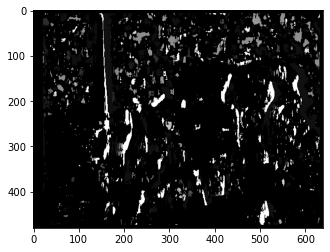

In [2]:
imgL = cv2.imread('foto_4_L.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('foto_4_R.jpg', cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)

plt.imshow(disparity,'gray')
plt.show()

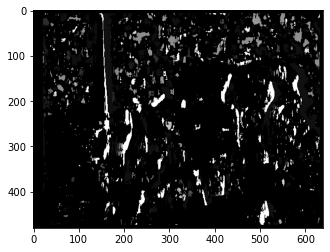

(480, 640)

In [3]:
# read two input images as grayscale images
imgL = cv2.imread('foto_4_L.jpg',0)
imgR = cv2.imread('foto_4_R.jpg',0)

# Initiate and StereoBM object
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

# compute the disparity map
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()
disparity.shape

In [4]:
model = YOLO('yolov8n.pt')

In [5]:
result = model.predict(
   source='foto_4_R.jpg',
   conf=0.25
)


image 1/1 /home/sleepkat/foto_4_R.jpg: 480x640 1 person, 1 cell phone, 48.1ms
Speed: 47.6ms preprocess, 48.1ms inference, 308.0ms postprocess per image at shape (1, 3, 480, 640)


In [6]:
res_R = result[0]
print(len(res_R.boxes))

2


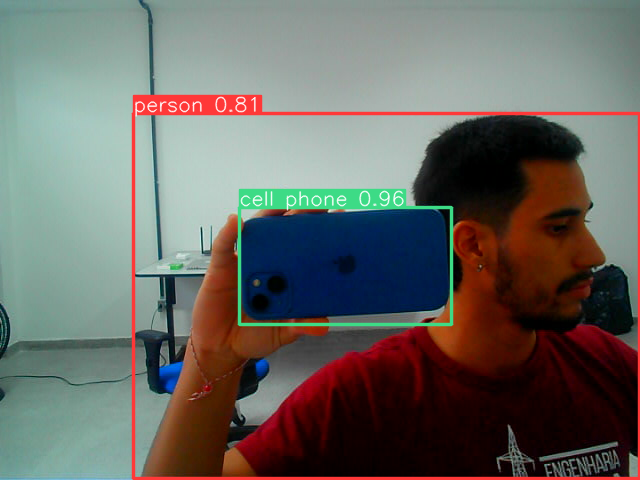

In [7]:
Image.fromarray(res_R.plot()[:,:,::-1])


image 1/1 /home/sleepkat/foto_4_L.jpg: 480x640 1 person, 1 apple, 1 laptop, 1 cell phone, 46.9ms
Speed: 2.6ms preprocess, 46.9ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


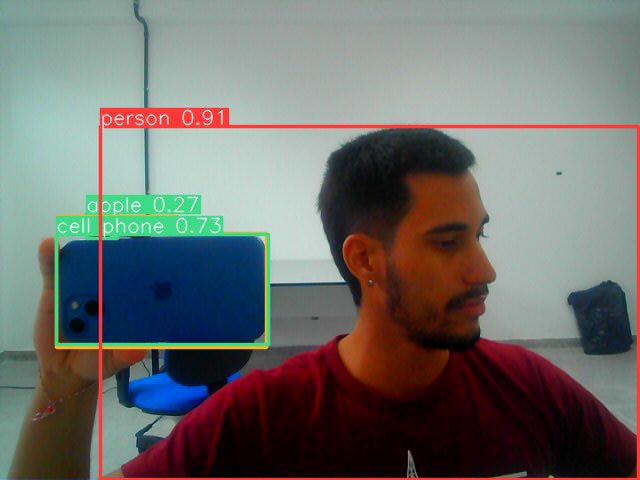

In [8]:
result = model.predict(
   source='foto_4_L.jpg',
   conf=0.25
)
res_L = result[0]
Image.fromarray(res_L.plot()[:,:,::-1])

In [9]:
!yolo task=segment mode=predict model=yolov8x-seg.pt source='foto_4_L.jpg' show=True

Ultralytics YOLOv8.0.128 🚀 Python-3.10.6 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce 930M, 4044MiB)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

image 1/1 /home/sleepkat/foto_4_L.jpg: 480x640 1 person, 1 cell phone, 1123.4ms
Speed: 3.7ms preprocess, 1123.4ms inference, 92.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict4


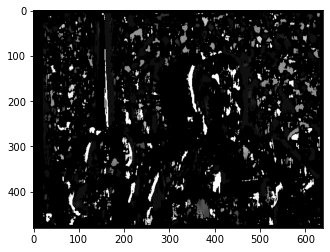

In [10]:
imgL = cv2.imread('foto_5_L.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('foto_5_R.jpg', cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)

plt.imshow(disparity,'gray')
plt.show()

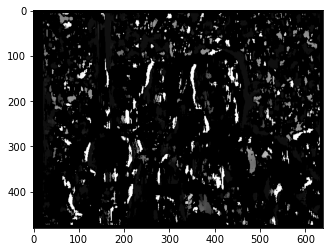

In [11]:
imgL = cv2.imread('foto_6_L.jpg', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('foto_6_R.jpg', cv2.IMREAD_GRAYSCALE)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)

plt.imshow(disparity,'gray')
plt.show()

In [12]:
for box in res_L.boxes:
    label_L = res_L.names[box.cls[0].item()]
    cords_L = [round(x) for x in box.xyxy[0].tolist()]
    print(label_L)
    print(cords_L)

person
[100, 127, 639, 479]
cell phone
[57, 235, 269, 345]
laptop
[56, 233, 267, 347]
apple
[86, 213, 117, 238]


In [13]:
for box in res_R.boxes:
    label_R = res_R.names[box.cls[0].item()]
    cords_R= [round(x) for x in box.xyxy[0].tolist()]
    print(label_R)
    print(cords_R)

cell phone
[240, 208, 451, 325]
person
[133, 113, 640, 478]


In [4]:
# start webcam
cap = cv2.VideoCapture(2)
cap.set(3, 1280)
cap.set(4, 480)

# model
model = YOLO("yolo-Weights/yolov8n.pt")

# object classes
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]


while True:
    success, img = cap.read()
    results = model(img, stream=True)

    # coordinates
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # bounding box
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2) # convert to int values

            # put box in cam
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)

            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->",confidence)

            # class name
            cls = int(box.cls[0])
            print("Class name -->", classNames[cls])
            
            # coord boxes
            crd = list[x1,x2]
            print("Coordinates -->", crd)

            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1
            color = (255, 0, 0)
            thickness = 2

            cv2.putText(img, classNames[cls], org, font, fontScale, color, thickness)

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 256x640 1 traffic light, 100.9ms
Speed: 4.3ms preprocess, 100.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> traffic light
Coordinates --> list[800, 824]


0: 256x640 1 traffic light, 1 kite, 208.6ms
Speed: 13.4ms preprocess, 208.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 115.4ms
Speed: 8.8ms preprocess, 115.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.3
Class name --> kite
Coordinates --> list[276, 325]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[800, 824]


0: 256x640 1 traffic light, 1 kite, 118.0ms
Speed: 21.4ms preprocess, 118.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 92.5ms
Speed: 5.1ms preprocess, 92.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.35
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.27
Class name --> kite
Coordinates --> list[276, 325]
Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[801, 824]
Confidence ---> 0.33
Class name --> kite
Coordinates --> list[276, 325]


0: 256x640 1 traffic light, 150.0ms
Speed: 8.2ms preprocess, 150.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 96.9ms
Speed: 7.4ms preprocess, 96.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.35
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.43
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.27
Class name --> kite
Coordinates --> list[276, 325]


0: 256x640 1 traffic light, 112.9ms
Speed: 14.6ms preprocess, 112.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 traffic lights, 1 kite, 85.2ms
Speed: 26.3ms preprocess, 85.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.45
Class name --> traffic light
Coordinates --> list[801, 824]
Confidence ---> 0.42
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.31
Class name --> traffic light
Coordinates --> list[237, 264]
Confidence ---> 0.28
Class name --> kite
Coordinates --> list[276, 325]


0: 256x640 1 traffic light, 1 kite, 107.4ms
Speed: 4.4ms preprocess, 107.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 traffic lights, 108.3ms
Speed: 2.1ms preprocess, 108.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.3
Class name --> kite
Coordinates --> list[276, 325]
Confidence ---> 0.45
Class name --> traffic light
Coordinates --> list[801, 824]
Confidence ---> 0.27
Class name --> traffic light
Coordinates --> list[238, 263]


0: 256x640 2 traffic lights, 1 kite, 111.7ms
Speed: 5.1ms preprocess, 111.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 108.8ms
Speed: 1.7ms preprocess, 108.8ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.27
Class name --> kite
Coordinates --> list[276, 325]
Confidence ---> 0.26
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.48
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.29
Class name --> kite
Coordinates --> list[276, 325]


0: 256x640 2 traffic lights, 130.2ms
Speed: 14.1ms preprocess, 130.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 traffic lights, 1 kite, 102.4ms
Speed: 1.9ms preprocess, 102.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.26
Class name --> traffic light
Coordinates --> list[237, 264]
Confidence ---> 0.5
Class name --> traffic light
Coordinates --> list[801, 824]
Confidence ---> 0.31
Class name --> kite
Coordinates --> list[276, 325]
Confidence ---> 0.3
Class name --> traffic light
Coordinates --> list[237, 264]


0: 256x640 1 traffic light, 1 kite, 113.6ms
Speed: 8.1ms preprocess, 113.6ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 88.8ms
Speed: 24.5ms preprocess, 88.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.4
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.29
Class name --> kite
Coordinates --> list[276, 325]
Confidence ---> 0.44
Class name --> traffic light
Coordinates --> list[800, 824]
Confidence ---> 0.37
Class name --> kite
Coordinates --> list[277, 325]


0: 256x640 1 traffic light, 106.7ms
Speed: 7.3ms preprocess, 106.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 89.4ms
Speed: 7.9ms preprocess, 89.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.47
Class name --> traffic light
Coordinates --> list[801, 824]
Confidence ---> 0.37
Class name --> traffic light
Coordinates --> list[800, 824]


0: 256x640 1 traffic light, 112.8ms
Speed: 6.4ms preprocess, 112.8ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 136.1ms
Speed: 6.6ms preprocess, 136.1ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.45
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.33
Class name --> kite
Coordinates --> list[277, 325]


0: 256x640 1 traffic light, 1 kite, 152.4ms
Speed: 6.9ms preprocess, 152.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 124.4ms
Speed: 2.9ms preprocess, 124.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.45
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.41
Class name --> kite
Coordinates --> list[277, 325]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.32
Class name --> kite
Coordinates --> list[278, 325]


0: 256x640 2 traffic lights, 1 kite, 108.4ms
Speed: 8.3ms preprocess, 108.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 103.7ms
Speed: 6.4ms preprocess, 103.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.37
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.32
Class name --> kite
Coordinates --> list[277, 325]
Confidence ---> 0.26
Class name --> traffic light
Coordinates --> list[799, 826]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.34
Class name --> kite
Coordinates --> list[277, 325]


0: 256x640 2 traffic lights, 1 kite, 95.4ms
Speed: 26.1ms preprocess, 95.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 110.7ms
Speed: 1.6ms preprocess, 110.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.4
Class name --> traffic light
Coordinates --> list[239, 265]
Confidence ---> 0.31
Class name --> kite
Coordinates --> list[277, 325]
Confidence ---> 0.29
Class name --> traffic light
Coordinates --> list[800, 826]


0: 256x640 (no detections), 107.0ms
Speed: 6.1ms preprocess, 107.0ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 145.4ms
Speed: 38.3ms preprocess, 145.4ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 87.5ms
Speed: 6.6ms preprocess, 87.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 kite, 98.8ms
Speed: 2.4ms preprocess, 98.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 93.7ms
Speed: 4.1ms preprocess, 93.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.33
Class name --> kite
Coordinates --> list[836, 886]


0: 256x640 1 person, 102.9ms
Speed: 10.8ms preprocess, 102.9ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.43
Class name --> person
Coordinates --> list[726, 1279]


0: 256x640 1 person, 1 cup, 185.1ms
Speed: 10.5ms preprocess, 185.1ms inference, 3.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 97.4ms
Speed: 4.1ms preprocess, 97.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.74
Class name --> person
Coordinates --> list[641, 1278]
Confidence ---> 0.29
Class name --> cup
Coordinates --> list[295, 545]
Confidence ---> 0.29
Class name --> person
Coordinates --> list[1006, 1279]


0: 256x640 3 persons, 108.2ms
Speed: 6.9ms preprocess, 108.2ms inference, 33.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 102.5ms
Speed: 1.9ms preprocess, 102.5ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.84
Class name --> person
Coordinates --> list[676, 1277]
Confidence ---> 0.68
Class name --> person
Coordinates --> list[331, 570]
Confidence ---> 0.35
Class name --> person
Coordinates --> list[1007, 1278]
Confidence ---> 0.85
Class name --> person
Coordinates --> list[699, 1277]
Confidence ---> 0.49
Class name --> person
Coordinates --> list[1003, 1277]


0: 256x640 2 persons, 1 tie, 1 toothbrush, 111.6ms
Speed: 1.9ms preprocess, 111.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 99.6ms
Speed: 4.7ms preprocess, 99.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.56
Class name --> person
Coordinates --> list[659, 1278]
Confidence ---> 0.41
Class name --> person
Coordinates --> list[249, 634]
Confidence ---> 0.32
Class name --> toothbrush
Coordinates --> list[250, 620]
Confidence ---> 0.27
Class name --> tie
Coordinates --> list[941, 1278]
Confidence ---> 0.72
Class name --> person
Coordinates --> list[2, 639]


0: 256x640 (no detections), 93.5ms
Speed: 2.4ms preprocess, 93.5ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 93.6ms
Speed: 3.3ms preprocess, 93.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 127.6ms
Speed: 2.5ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.72
Class name --> person
Coordinates --> list[642, 870]
Confidence ---> 0.42
Class name --> person
Coordinates --> list[1, 543]
Confidence ---> 0.32
Class name --> person
Coordinates --> list[0, 222]


0: 256x640 1 traffic light, 1 kite, 101.8ms
Speed: 3.4ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 90.5ms
Speed: 14.9ms preprocess, 90.5ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.52
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.44
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.55
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.44
Class name --> traffic light
Coordinates --> list[240, 265]


0: 256x640 1 traffic light, 1 kite, 138.1ms
Speed: 8.7ms preprocess, 138.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 110.8ms
Speed: 2.3ms preprocess, 110.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.51
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.48
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.48
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.43
Class name --> traffic light
Coordinates --> list[240, 264]


0: 256x640 1 traffic light, 1 kite, 155.9ms
Speed: 5.6ms preprocess, 155.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 96.1ms
Speed: 7.1ms preprocess, 96.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.53
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.38
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.48
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.43
Class name --> kite
Coordinates --> list[277, 327]


0: 256x640 1 traffic light, 1 kite, 103.2ms
Speed: 9.2ms preprocess, 103.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 96.0ms
Speed: 2.9ms preprocess, 96.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.52
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.41
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.47
Class name --> traffic light
Coordinates --> list[240, 264]
Confidence ---> 0.45
Class name --> kite
Coordinates --> list[277, 327]


0: 256x640 1 traffic light, 1 kite, 116.4ms
Speed: 2.4ms preprocess, 116.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 107.1ms
Speed: 1.8ms preprocess, 107.1ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.45
Class name --> traffic light
Coordinates --> list[239, 265]
Confidence ---> 0.45
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.51
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.5
Class name --> traffic light
Coordinates --> list[239, 264]


0: 256x640 1 traffic light, 1 kite, 113.7ms
Speed: 1.8ms preprocess, 113.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 99.8ms
Speed: 3.2ms preprocess, 99.8ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.46
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.42
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.42
Class name --> traffic light
Coordinates --> list[239, 265]


0: 256x640 1 traffic light, 1 kite, 112.4ms
Speed: 2.8ms preprocess, 112.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 103.0ms
Speed: 15.7ms preprocess, 103.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.43
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.42
Class name --> traffic light
Coordinates --> list[240, 264]
Confidence ---> 0.49
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.46
Class name --> traffic light
Coordinates --> list[240, 265]


0: 256x640 1 traffic light, 1 kite, 167.7ms
Speed: 5.9ms preprocess, 167.7ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 108.1ms
Speed: 4.6ms preprocess, 108.1ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.33
Class name --> traffic light
Coordinates --> list[240, 264]
Confidence ---> 0.42
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[240, 264]


0: 256x640 1 traffic light, 1 kite, 116.9ms
Speed: 3.5ms preprocess, 116.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 95.4ms
Speed: 10.1ms preprocess, 95.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.44
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.37
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.46
Class name --> traffic light
Coordinates --> list[239, 265]
Confidence ---> 0.37
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 107.9ms
Speed: 4.3ms preprocess, 107.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 108.0ms
Speed: 2.2ms preprocess, 108.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.46
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.45
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.39
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[239, 265]


0: 256x640 1 traffic light, 1 kite, 113.8ms
Speed: 8.6ms preprocess, 113.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 109.3ms
Speed: 3.0ms preprocess, 109.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.48
Class name --> kite
Coordinates --> list[278, 326]
Confidence ---> 0.45
Class name --> traffic light
Coordinates --> list[240, 264]
Confidence ---> 0.5
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.48
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 136.3ms
Speed: 13.2ms preprocess, 136.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 114.2ms
Speed: 4.5ms preprocess, 114.2ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.46
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.34
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.46
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.42
Class name --> traffic light
Coordinates --> list[240, 264]


0: 256x640 1 traffic light, 1 kite, 130.3ms
Speed: 1.9ms preprocess, 130.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 106.4ms
Speed: 6.5ms preprocess, 106.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.46
Class name --> traffic light
Coordinates --> list[239, 265]
Confidence ---> 0.45
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.45
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.4
Class name --> traffic light
Coordinates --> list[239, 264]


0: 256x640 1 traffic light, 1 kite, 104.9ms
Speed: 1.8ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 104.9ms
Speed: 2.2ms preprocess, 104.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.34
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.33
Class name --> kite
Coordinates --> list[277, 327]


0: 256x640 (no detections), 103.7ms
Speed: 11.6ms preprocess, 103.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 92.9ms
Speed: 1.6ms preprocess, 92.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 87.8ms
Speed: 2.4ms preprocess, 87.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 dog, 93.9ms
Speed: 5.0ms preprocess, 93.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 cell phone, 120.5ms
Speed: 7.2ms preprocess, 120.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.78
Class name --> person
Coordinates --> list[640, 856]
Confidence ---> 0.44
Class name --> person
Coordinates --> list[0, 451]
Confidence ---> 0.31
Class name --> dog
Coordinates --> list[37, 452]
Confidence ---> 0.83
Class name --> person
Coordinates --> list[0, 442]
Confidence ---> 0.66
Class name --> person
Coordinates --> list[640, 834]
Confidence ---> 0.49
Class name --> cell phone
Coordinates --> list[641, 783]


0: 256x640 2 persons, 109.9ms
Speed: 5.3ms preprocess, 109.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 persons, 1 traffic light, 111.0ms
Speed: 4.3ms preprocess, 111.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.88
Class name --> person
Coordinates --> list[640, 840]
Confidence ---> 0.65
Class name --> person
Coordinates --> list[0, 471]
Confidence ---> 0.84
Class name --> person
Coordinates --> list[641, 884]
Confidence ---> 0.51
Class name --> traffic light
Coordinates --> list[1, 477]
Confidence ---> 0.37
Class name --> person
Coordinates --> list[0, 347]
Confidence ---> 0.3
Class name --> person
Coordinates --> list[1, 496]


0: 256x640 3 persons, 117.3ms
Speed: 7.6ms preprocess, 117.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 95.2ms
Speed: 2.6ms preprocess, 95.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.86
Class name --> person
Coordinates --> list[641, 906]
Confidence ---> 0.54
Class name --> person
Coordinates --> list[1, 508]
Confidence ---> 0.29
Class name --> person
Coordinates --> list[0, 404]
Confidence ---> 0.58
Class name --> person
Coordinates --> list[641, 996]
Confidence ---> 0.37
Class name --> person
Coordinates --> list[2, 553]


0: 256x640 1 person, 2 dogs, 113.0ms
Speed: 3.5ms preprocess, 113.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 cat, 98.7ms
Speed: 7.1ms preprocess, 98.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.35
Class name --> person
Coordinates --> list[641, 1102]
Confidence ---> 0.32
Class name --> dog
Coordinates --> list[655, 1105]
Confidence ---> 0.26
Class name --> dog
Coordinates --> list[870, 1105]
Confidence ---> 0.5
Class name --> cat
Coordinates --> list[915, 1191]
Confidence ---> 0.49
Class name --> person
Coordinates --> list[0, 617]
Confidence ---> 0.33
Class name --> person
Coordinates --> list[641, 1201]


0: 256x640 1 person, 1 couch, 2 laptops, 117.2ms
Speed: 4.2ms preprocess, 117.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 2 couchs, 2 laptops, 104.5ms
Speed: 10.5ms preprocess, 104.5ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.79
Class name --> laptop
Coordinates --> list[142, 606]
Confidence ---> 0.45
Class name --> sofa
Coordinates --> list[0, 650]
Confidence ---> 0.32
Class name --> person
Coordinates --> list[640, 1280]
Confidence ---> 0.29
Class name --> laptop
Coordinates --> list[638, 958]
Confidence ---> 0.9
Class name --> laptop
Coordinates --> list[168, 624]
Confidence ---> 0.8
Class name --> laptop
Coordinates --> list[638, 979]
Confidence ---> 0.41
Class name --> sofa
Coordinates --> list[2, 657]
Confidence ---> 0.4
Class name --> person
Coordinates --> list[0, 640]
Confidence ---> 0.29
Class name --> person
Coordinates --> list[638, 1280]
Confidence ---> 0.29
Class name --> sofa
Coordinates --> list[638, 1280]


0: 256x640 2 persons, 2 laptops, 110.4ms
Speed: 5.8ms preprocess, 110.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 2 laptops, 100.3ms
Speed: 9.4ms preprocess, 100.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.75
Class name --> laptop
Coordinates --> list[638, 993]
Confidence ---> 0.68
Class name --> person
Coordinates --> list[0, 804]
Confidence ---> 0.47
Class name --> laptop
Coordinates --> list[178, 638]
Confidence ---> 0.35
Class name --> person
Coordinates --> list[11, 1276]
Confidence ---> 0.88
Class name --> person
Coordinates --> list[0, 653]
Confidence ---> 0.58
Class name --> laptop
Coordinates --> list[182, 635]
Confidence ---> 0.53
Class name --> person
Coordinates --> list[639, 1280]
Confidence ---> 0.4
Class name --> laptop
Coordinates --> list[641, 983]


0: 256x640 2 persons, 1 laptop, 102.4ms
Speed: 3.7ms preprocess, 102.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 laptop, 95.5ms
Speed: 5.1ms preprocess, 95.5ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.88
Class name --> person
Coordinates --> list[0, 640]
Confidence ---> 0.66
Class name --> person
Coordinates --> list[638, 1279]
Confidence ---> 0.37
Class name --> laptop
Coordinates --> list[181, 632]
Confidence ---> 0.88
Class name --> person
Coordinates --> list[0, 641]
Confidence ---> 0.69
Class name --> person
Coordinates --> list[641, 1278]
Confidence ---> 0.31
Class name --> laptop
Coordinates --> list[184, 636]


0: 256x640 2 persons, 1 laptop, 107.4ms
Speed: 1.7ms preprocess, 107.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 laptop, 118.0ms
Speed: 9.4ms preprocess, 118.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.88
Class name --> person
Coordinates --> list[0, 641]
Confidence ---> 0.73
Class name --> person
Coordinates --> list[639, 1278]
Confidence ---> 0.34
Class name --> laptop
Coordinates --> list[185, 636]
Confidence ---> 0.88
Class name --> person
Coordinates --> list[0, 641]
Confidence ---> 0.77
Class name --> person
Coordinates --> list[641, 1278]
Confidence ---> 0.45
Class name --> laptop
Coordinates --> list[185, 636]


0: 256x640 2 persons, 108.1ms
Speed: 3.3ms preprocess, 108.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 112.8ms
Speed: 2.3ms preprocess, 112.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.82
Class name --> person
Coordinates --> list[0, 643]
Confidence ---> 0.71
Class name --> person
Coordinates --> list[641, 1278]
Confidence ---> 0.82
Class name --> person
Coordinates --> list[0, 643]
Confidence ---> 0.63
Class name --> person
Coordinates --> list[638, 1279]


0: 256x640 2 persons, 107.3ms
Speed: 6.0ms preprocess, 107.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 95.5ms
Speed: 3.6ms preprocess, 95.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.83
Class name --> person
Coordinates --> list[0, 643]
Confidence ---> 0.74
Class name --> person
Coordinates --> list[640, 1278]
Confidence ---> 0.79
Class name --> person
Coordinates --> list[0, 645]
Confidence ---> 0.66
Class name --> person
Coordinates --> list[637, 1279]


0: 256x640 2 persons, 106.6ms
Speed: 10.4ms preprocess, 106.6ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 bed, 104.4ms
Speed: 4.2ms preprocess, 104.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.75
Class name --> person
Coordinates --> list[0, 644]
Confidence ---> 0.67
Class name --> person
Coordinates --> list[637, 1279]
Confidence ---> 0.77
Class name --> person
Coordinates --> list[0, 644]
Confidence ---> 0.59
Class name --> person
Coordinates --> list[637, 1279]
Confidence ---> 0.3
Class name --> bed
Coordinates --> list[0, 1273]


0: 256x640 1 person, 143.9ms
Speed: 4.3ms preprocess, 143.9ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 111.7ms
Speed: 3.6ms preprocess, 111.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.46
Class name --> person
Coordinates --> list[0, 1274]
Confidence ---> 0.62
Class name --> person
Coordinates --> list[34, 1279]


0: 256x640 1 person, 1 laptop, 110.6ms
Speed: 17.5ms preprocess, 110.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 1 laptop, 103.4ms
Speed: 2.2ms preprocess, 103.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.69
Class name --> laptop
Coordinates --> list[199, 1028]
Confidence ---> 0.52
Class name --> person
Coordinates --> list[0, 1175]
Confidence ---> 0.68
Class name --> laptop
Coordinates --> list[166, 1027]
Confidence ---> 0.66
Class name --> person
Coordinates --> list[0, 1141]


0: 256x640 1 person, 1 laptop, 103.1ms
Speed: 1.8ms preprocess, 103.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 laptop, 1 book, 85.8ms
Speed: 16.3ms preprocess, 85.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.63
Class name --> laptop
Coordinates --> list[158, 1027]
Confidence ---> 0.59
Class name --> person
Coordinates --> list[0, 1132]
Confidence ---> 0.55
Class name --> person
Coordinates --> list[0, 678]
Confidence ---> 0.44
Class name --> book
Coordinates --> list[147, 638]
Confidence ---> 0.4
Class name --> laptop
Coordinates --> list[638, 1003]
Confidence ---> 0.29
Class name --> person
Coordinates --> list[631, 1278]


0: 256x640 6 persons, 1 book, 106.7ms
Speed: 3.1ms preprocess, 106.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 117.4ms
Speed: 3.6ms preprocess, 117.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.53
Class name --> person
Coordinates --> list[489, 639]
Confidence ---> 0.48
Class name --> person
Coordinates --> list[0, 1220]
Confidence ---> 0.39
Class name --> book
Coordinates --> list[61, 580]
Confidence ---> 0.39
Class name --> person
Coordinates --> list[624, 1278]
Confidence ---> 0.33
Class name --> person
Coordinates --> list[345, 1278]
Confidence ---> 0.3
Class name --> person
Coordinates --> list[0, 679]
Confidence ---> 0.27
Class name --> person
Coordinates --> list[829, 1278]
Confidence ---> 0.66
Class name --> person
Coordinates --> list[693, 1279]
Confidence ---> 0.38
Class name --> person
Coordinates --> list[1, 642]


0: 256x640 2 persons, 127.1ms
Speed: 8.7ms preprocess, 127.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 89.0ms
Speed: 25.7ms preprocess, 89.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.75
Class name --> person
Coordinates --> list[641, 1280]
Confidence ---> 0.53
Class name --> person
Coordinates --> list[3, 641]
Confidence ---> 0.74
Class name --> person
Coordinates --> list[642, 1278]
Confidence ---> 0.64
Class name --> person
Coordinates --> list[0, 638]


0: 256x640 2 persons, 102.9ms
Speed: 2.4ms preprocess, 102.9ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 94.3ms
Speed: 13.7ms preprocess, 94.3ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.72
Class name --> person
Coordinates --> list[1, 637]
Confidence ---> 0.38
Class name --> person
Coordinates --> list[641, 1278]
Confidence ---> 0.26
Class name --> person
Coordinates --> list[1, 603]


0: 256x640 1 person, 117.2ms
Speed: 3.6ms preprocess, 117.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 100.1ms
Speed: 5.8ms preprocess, 100.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.84
Class name --> person
Coordinates --> list[1, 316]
Confidence ---> 0.71
Class name --> person
Coordinates --> list[2, 233]


0: 256x640 1 person, 110.5ms
Speed: 5.9ms preprocess, 110.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 96.6ms
Speed: 2.0ms preprocess, 96.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.71
Class name --> person
Coordinates --> list[1, 154]
Confidence ---> 0.47
Class name --> person
Coordinates --> list[0, 76]


0: 256x640 1 traffic light, 1 kite, 110.1ms
Speed: 7.9ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 kite, 92.9ms
Speed: 4.9ms preprocess, 92.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.34
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.33
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.53
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 2 kites, 97.3ms
Speed: 15.8ms preprocess, 97.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 kites, 113.2ms
Speed: 6.5ms preprocess, 113.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.55
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.32
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.32
Class name --> kite
Coordinates --> list[836, 886]
Confidence ---> 0.59
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.31
Class name --> kite
Coordinates --> list[836, 886]


0: 256x640 1 traffic light, 2 kites, 115.7ms
Speed: 5.3ms preprocess, 115.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 2 kites, 103.6ms
Speed: 2.2ms preprocess, 103.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.58
Class name --> kite
Coordinates --> list[277, 327]
Confidence ---> 0.42
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.28
Class name --> kite
Coordinates --> list[836, 886]
Confidence ---> 0.56
Class name --> kite
Coordinates --> list[278, 326]
Confidence ---> 0.44
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.26
Class name --> kite
Coordinates --> list[836, 886]


0: 256x640 2 traffic lights, 2 kites, 108.8ms
Speed: 2.7ms preprocess, 108.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.61
Class name --> kite
Coordinates --> list[278, 327]
Confidence ---> 0.33
Class name --> traffic light
Coordinates --> list[240, 265]
Confidence ---> 0.28
Class name --> kite
Coordinates --> list[836, 886]
Confidence ---> 0.27
Class name --> traffic light
Coordinates --> list[800, 826]


0: 256x640 1 traffic light, 1 kite, 163.6ms
Speed: 3.5ms preprocess, 163.6ms inference, 18.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 99.9ms
Speed: 5.6ms preprocess, 99.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.54
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.26
Class name --> kite
Coordinates --> list[277, 325]
Confidence ---> 0.54
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.29
Class name --> kite
Coordinates --> list[276, 326]


0: 256x640 1 traffic light, 1 kite, 104.2ms
Speed: 8.7ms preprocess, 104.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 90.0ms
Speed: 2.1ms preprocess, 90.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.58
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.36
Class name --> kite
Coordinates --> list[278, 326]
Confidence ---> 0.55
Class name --> traffic light
Coordinates --> list[239, 264]


0: 256x640 1 traffic light, 1 kite, 101.6ms
Speed: 5.4ms preprocess, 101.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 86.5ms
Speed: 16.7ms preprocess, 86.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.51
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.31
Class name --> kite
Coordinates --> list[276, 325]
Confidence ---> 0.57
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.41
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 99.8ms
Speed: 8.1ms preprocess, 99.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 102.1ms
Speed: 2.5ms preprocess, 102.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.56
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.28
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.57
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.35
Class name --> kite
Coordinates --> list[277, 327]


0: 256x640 1 traffic light, 1 kite, 108.2ms
Speed: 2.3ms preprocess, 108.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.64
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.31
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 190.4ms
Speed: 22.6ms preprocess, 190.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 114.9ms
Speed: 3.2ms preprocess, 114.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.54
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.28
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.55
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.37
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 105.5ms
Speed: 6.5ms preprocess, 105.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 133.9ms
Speed: 2.3ms preprocess, 133.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.37
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.31
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 105.4ms
Speed: 2.7ms preprocess, 105.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 89.4ms
Speed: 6.8ms preprocess, 89.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.53
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.38
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.35
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 104.4ms
Speed: 20.2ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 104.4ms
Speed: 4.4ms preprocess, 104.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.37
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.29
Class name --> kite
Coordinates --> list[278, 326]
Confidence ---> 0.47
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.34
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 107.7ms
Speed: 2.1ms preprocess, 107.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 95.7ms
Speed: 2.9ms preprocess, 95.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.45
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.44
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.46
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.44
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 101.0ms
Speed: 9.2ms preprocess, 101.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 111.6ms
Speed: 3.1ms preprocess, 111.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.42
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.37
Class name --> kite
Coordinates --> list[277, 325]
Confidence ---> 0.39
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[238, 264]


0: 256x640 1 traffic light, 1 kite, 111.1ms
Speed: 5.5ms preprocess, 111.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 95.7ms
Speed: 4.7ms preprocess, 95.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.35
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.43
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.36
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 99.4ms
Speed: 15.8ms preprocess, 99.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 111.4ms
Speed: 6.8ms preprocess, 111.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.4
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.49
Class name --> kite
Coordinates --> list[278, 326]
Confidence ---> 0.37
Class name --> traffic light
Coordinates --> list[238, 264]


0: 256x640 1 traffic light, 1 kite, 121.5ms
Speed: 3.0ms preprocess, 121.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 115.1ms
Speed: 11.9ms preprocess, 115.1ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.4
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.37
Class name --> traffic light
Coordinates --> list[239, 265]
Confidence ---> 0.46
Class name --> kite
Coordinates --> list[278, 326]
Confidence ---> 0.41
Class name --> traffic light
Coordinates --> list[239, 264]


0: 256x640 1 traffic light, 1 kite, 103.3ms
Speed: 17.5ms preprocess, 103.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> traffic light
Coordinates --> list[239, 265]
Confidence ---> 0.34
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 172.1ms
Speed: 7.9ms preprocess, 172.1ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 116.0ms
Speed: 3.8ms preprocess, 116.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.49
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.35
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.49
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.42
Class name --> kite
Coordinates --> list[277, 325]


0: 256x640 1 traffic light, 102.3ms
Speed: 4.7ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 102.7ms
Speed: 9.5ms preprocess, 102.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.32
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.38
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.35
Class name --> traffic light
Coordinates --> list[239, 264]


0: 256x640 1 traffic light, 1 kite, 79.0ms
Speed: 3.7ms preprocess, 79.0ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 94.0ms
Speed: 5.9ms preprocess, 94.0ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.37
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.36
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.38
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.38
Class name --> traffic light
Coordinates --> list[238, 264]


0: 256x640 1 traffic light, 1 kite, 103.0ms
Speed: 1.8ms preprocess, 103.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 98.3ms
Speed: 3.9ms preprocess, 98.3ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.32
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.32
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.35
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.32
Class name --> traffic light
Coordinates --> list[238, 264]


0: 256x640 1 traffic light, 1 kite, 112.4ms
Speed: 6.9ms preprocess, 112.4ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 115.6ms
Speed: 4.0ms preprocess, 115.6ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.38
Class name --> traffic light
Coordinates --> list[238, 264]
Confidence ---> 0.39
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.37
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 127.6ms
Speed: 1.9ms preprocess, 127.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 kite, 115.2ms
Speed: 2.1ms preprocess, 115.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.51
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.45
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.52
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 traffic light, 1 kite, 107.6ms
Speed: 3.2ms preprocess, 107.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 1 kite, 90.4ms
Speed: 11.0ms preprocess, 90.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.42
Class name --> kite
Coordinates --> list[277, 326]
Confidence ---> 0.33
Class name --> traffic light
Coordinates --> list[238, 265]
Confidence ---> 0.44
Class name --> traffic light
Coordinates --> list[239, 264]
Confidence ---> 0.29
Class name --> kite
Coordinates --> list[277, 326]


0: 256x640 1 kite, 105.9ms
Speed: 2.3ms preprocess, 105.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.8ms
Speed: 7.8ms preprocess, 96.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.48
Class name --> kite
Coordinates --> list[818, 873]


0: 256x640 (no detections), 106.0ms
Speed: 3.8ms preprocess, 106.0ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 93.9ms
Speed: 2.8ms preprocess, 93.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 131.1ms
Speed: 6.5ms preprocess, 131.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 109.0ms
Speed: 3.6ms preprocess, 109.0ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 116.3ms
Speed: 11.8ms preprocess, 116.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 90.7ms
Speed: 4.6ms preprocess, 90.7ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 107.0ms
Speed: 3.4ms preprocess, 107.0ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 114.6ms
Speed: 11.5ms preproce

Confidence ---> 0.36
Class name --> person
Coordinates --> list[0, 70]
Confidence ---> 0.37
Class name --> person
Coordinates --> list[0, 89]


0: 256x640 1 person, 110.6ms
Speed: 3.5ms preprocess, 110.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 112.8ms
Speed: 2.4ms preprocess, 112.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.4
Class name --> person
Coordinates --> list[0, 98]


0: 256x640 (no detections), 108.1ms
Speed: 17.2ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 101.1ms
Speed: 3.7ms preprocess, 101.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 146.0ms
Speed: 5.6ms preprocess, 146.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 107.0ms
Speed: 9.2ms preprocess, 107.0ms inference, 10.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 108.9ms
Speed: 5.2ms preprocess, 108.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 115.1ms
Speed: 3.5ms preprocess, 115.1ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.5ms
Speed: 6.0ms preprocess, 96.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 99.8ms
Speed: 3.1ms preprocess, 99

Confidence ---> 0.41
Class name --> person
Coordinates --> list[0, 73]


0: 256x640 (no detections), 110.8ms
Speed: 6.8ms preprocess, 110.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 93.1ms
Speed: 5.7ms preprocess, 93.1ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 134.8ms
Speed: 2.6ms preprocess, 134.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 106.1ms
Speed: 20.6ms preprocess, 106.1ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 149.7ms
Speed: 3.2ms preprocess, 149.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.2ms
Speed: 4.1ms preprocess, 96.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 114.9ms
Speed: 4.9ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.3ms
Speed: 3.5ms preprocess

Confidence ---> 0.61
Class name --> person
Coordinates --> list[0, 401]
Confidence ---> 0.93
Class name --> person
Coordinates --> list[0, 370]


0: 256x640 1 person, 105.8ms
Speed: 1.7ms preprocess, 105.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 94.3ms
Speed: 2.0ms preprocess, 94.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.86
Class name --> person
Coordinates --> list[0, 363]
Confidence ---> 0.91
Class name --> person
Coordinates --> list[0, 370]


0: 256x640 2 persons, 104.9ms
Speed: 4.4ms preprocess, 104.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 107.3ms
Speed: 9.2ms preprocess, 107.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.79
Class name --> person
Coordinates --> list[0, 388]
Confidence ---> 0.32
Class name --> person
Coordinates --> list[641, 809]
Confidence ---> 0.76
Class name --> person
Coordinates --> list[0, 391]


0: 256x640 2 persons, 104.4ms
Speed: 2.8ms preprocess, 104.4ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 89.7ms
Speed: 16.4ms preprocess, 89.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.88
Class name --> person
Coordinates --> list[1, 390]
Confidence ---> 0.36
Class name --> person
Coordinates --> list[641, 814]
Confidence ---> 0.85
Class name --> person
Coordinates --> list[0, 379]


0: 256x640 1 person, 99.2ms
Speed: 10.2ms preprocess, 99.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 1 teddy bear, 107.2ms
Speed: 2.4ms preprocess, 107.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.69
Class name --> person
Coordinates --> list[0, 360]
Confidence ---> 0.47
Class name --> person
Coordinates --> list[0, 341]
Confidence ---> 0.41
Class name --> person
Coordinates --> list[640, 769]
Confidence ---> 0.36
Class name --> teddy bear
Coordinates --> list[0, 345]


0: 256x640 2 persons, 1 dog, 127.1ms
Speed: 10.0ms preprocess, 127.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 90.5ms
Speed: 5.9ms preprocess, 90.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.45
Class name --> person
Coordinates --> list[641, 751]
Confidence ---> 0.4
Class name --> person
Coordinates --> list[0, 332]
Confidence ---> 0.34
Class name --> dog
Coordinates --> list[0, 337]


0: 256x640 1 person, 112.2ms
Speed: 3.1ms preprocess, 112.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 95.4ms
Speed: 3.0ms preprocess, 95.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.33
Class name --> person
Coordinates --> list[0, 469]
Confidence ---> 0.54
Class name --> person
Coordinates --> list[9, 639]


0: 256x640 1 person, 101.6ms
Speed: 8.5ms preprocess, 101.6ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 92.1ms
Speed: 2.5ms preprocess, 92.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.27
Class name --> person
Coordinates --> list[0, 634]
Confidence ---> 0.54
Class name --> person
Coordinates --> list[0, 272]
Confidence ---> 0.48
Class name --> person
Coordinates --> list[2, 638]


0: 256x640 1 person, 116.5ms
Speed: 2.8ms preprocess, 116.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 persons, 161.4ms
Speed: 3.7ms preprocess, 161.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)


Confidence ---> 0.77
Class name --> person
Coordinates --> list[1, 355]
Confidence ---> 0.84
Class name --> person
Coordinates --> list[1, 553]
Confidence ---> 0.32
Class name --> person
Coordinates --> list[675, 1278]
Confidence ---> 0.28
Class name --> person
Coordinates --> list[640, 785]



0: 256x640 3 persons, 102.5ms
Speed: 7.8ms preprocess, 102.5ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 persons, 97.9ms
Speed: 13.5ms preprocess, 97.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.85
Class name --> person
Coordinates --> list[1, 613]
Confidence ---> 0.38
Class name --> person
Coordinates --> list[643, 1279]
Confidence ---> 0.28
Class name --> person
Coordinates --> list[641, 837]
Confidence ---> 0.81
Class name --> person
Coordinates --> list[2, 639]
Confidence ---> 0.61
Class name --> person
Coordinates --> list[640, 925]
Confidence ---> 0.33
Class name --> person
Coordinates --> list[643, 1278]


0: 256x640 1 person, 1 bed, 176.0ms
Speed: 3.7ms preprocess, 176.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 89.8ms
Speed: 8.5ms preprocess, 89.8ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.71
Class name --> person
Coordinates --> list[641, 995]
Confidence ---> 0.42
Class name --> bed
Coordinates --> list[1, 638]
Confidence ---> 0.62
Class name --> person
Coordinates --> list[641, 1278]
Confidence ---> 0.32
Class name --> person
Coordinates --> list[641, 1046]


0: 256x640 2 persons, 112.1ms
Speed: 14.9ms preprocess, 112.1ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 103.6ms
Speed: 2.0ms preprocess, 103.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.5
Class name --> person
Coordinates --> list[636, 1278]
Confidence ---> 0.48
Class name --> person
Coordinates --> list[0, 1207]
Confidence ---> 0.61
Class name --> person
Coordinates --> list[642, 1276]
Confidence ---> 0.46
Class name --> person
Coordinates --> list[13, 1206]


0: 256x640 1 person, 117.2ms
Speed: 2.5ms preprocess, 117.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 99.8ms
Speed: 3.2ms preprocess, 99.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.71
Class name --> person
Coordinates --> list[5, 1189]
Confidence ---> 0.66
Class name --> person
Coordinates --> list[4, 1225]


0: 256x640 1 person, 100.7ms
Speed: 9.3ms preprocess, 100.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 96.7ms
Speed: 11.8ms preprocess, 96.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.59
Class name --> person
Coordinates --> list[2, 1262]
Confidence ---> 0.59
Class name --> person
Coordinates --> list[642, 1274]


0: 256x640 1 person, 115.1ms
Speed: 8.1ms preprocess, 115.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 164.8ms


Confidence ---> 0.69
Class name --> person
Coordinates --> list[641, 1276]
Confidence ---> 0.57
Class name --> person
Coordinates --> list[3, 1219]


Speed: 3.0ms preprocess, 164.8ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 persons, 88.8ms
Speed: 2.0ms preprocess, 88.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 147.8ms
Speed: 4.8ms preprocess, 147.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.53
Class name --> person
Coordinates --> list[639, 1074]
Confidence ---> 0.46
Class name --> person
Coordinates --> list[5, 1200]
Confidence ---> 0.36
Class name --> person
Coordinates --> list[632, 1278]
Confidence ---> 0.73
Class name --> person
Coordinates --> list[5, 1247]
Confidence ---> 0.27
Class name --> person
Coordinates --> list[522, 1277]


0: 256x640 1 person, 96.9ms
Speed: 1.8ms preprocess, 96.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 persons, 99.1ms
Speed: 11.4ms preprocess, 99.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.78
Class name --> person
Coordinates --> list[6, 1158]
Confidence ---> 0.7
Class name --> person
Coordinates --> list[3, 1219]
Confidence ---> 0.28
Class name --> person
Coordinates --> list[632, 1156]


0: 256x640 1 person, 116.5ms
Speed: 9.7ms preprocess, 116.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 98.6ms
Speed: 2.7ms preprocess, 98.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.52
Class name --> person
Coordinates --> list[642, 1195]
Confidence ---> 0.42
Class name --> person
Coordinates --> list[0, 1232]


0: 256x640 (no detections), 124.9ms
Speed: 2.8ms preprocess, 124.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 102.3ms
Speed: 4.2ms preprocess, 102.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 137.1ms
Speed: 7.3ms preprocess, 137.1ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.29
Class name --> person
Coordinates --> list[16, 1274]
Confidence ---> 0.27
Class name --> person
Coordinates --> list[10, 1274]


0: 256x640 (no detections), 127.1ms
Speed: 2.2ms preprocess, 127.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 120.9ms
Speed: 5.6ms preprocess, 120.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 97.7ms
Speed: 9.7ms preprocess, 97.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.61
Class name --> person
Coordinates --> list[640, 1277]


0: 256x640 (no detections), 155.3ms
Speed: 15.5ms preprocess, 155.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 92.2ms
Speed: 5.9ms preprocess, 92.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 101.6ms
Speed: 7.5ms preprocess, 101.6ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.6ms
Speed: 10.4ms preprocess, 98.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 89.2ms
Speed: 9.5ms preprocess, 89.2ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.8ms
Speed: 2.4ms preprocess, 96.8ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 89.3ms
Speed: 8.9ms preprocess, 89.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 118.9ms
Speed: 9.8ms preprocess, 118.9ms i

Confidence ---> 0.35
Class name --> person
Coordinates --> list[4, 1091]


0: 256x640 1 bowl, 108.8ms
Speed: 3.4ms preprocess, 108.8ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 108.9ms
Speed: 2.6ms preprocess, 108.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.27
Class name --> bowl
Coordinates --> list[643, 1277]


0: 256x640 1 person, 142.4ms
Speed: 5.3ms preprocess, 142.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 95.3ms
Speed: 2.0ms preprocess, 95.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.39
Class name --> person
Coordinates --> list[4, 808]


0: 256x640 1 person, 110.2ms
Speed: 8.0ms preprocess, 110.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 95.9ms
Speed: 6.9ms preprocess, 95.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.48
Class name --> person
Coordinates --> list[3, 639]
Confidence ---> 0.39
Class name --> person
Coordinates --> list[1, 370]


0: 256x640 (no detections), 108.0ms
Speed: 3.0ms preprocess, 108.0ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 118.7ms
Speed: 2.5ms preprocess, 118.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.3ms
Speed: 2.3ms preprocess, 98.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.58
Class name --> person
Coordinates --> list[1, 639]


0: 256x640 (no detections), 105.6ms
Speed: 3.0ms preprocess, 105.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 114.2ms
Speed: 3.3ms preprocess, 114.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 94.1ms
Speed: 5.6ms preprocess, 94.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 146.6ms
Speed: 10.2ms preprocess, 146.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 215.1ms
Speed: 9.0ms preprocess, 215.1ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 99.8ms
Speed: 2.6ms preprocess, 99.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 94.4ms
Speed: 5.6ms preprocess, 94.4ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 102.3ms
Speed: 3.2ms preprocess,

Confidence ---> 0.54
Class name --> vase
Coordinates --> list[81, 172]
Confidence ---> 0.41
Class name --> vase
Coordinates --> list[86, 184]


0: 256x640 2 vases, 122.9ms
Speed: 2.1ms preprocess, 122.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 107.0ms
Speed: 7.0ms preprocess, 107.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.7
Class name --> vase
Coordinates --> list[175, 270]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[688, 783]
Confidence ---> 0.66
Class name --> vase
Coordinates --> list[807, 893]
Confidence ---> 0.55
Class name --> vase
Coordinates --> list[296, 381]


0: 256x640 2 vases, 113.1ms
Speed: 2.2ms preprocess, 113.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 92.2ms
Speed: 5.3ms preprocess, 92.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.64
Class name --> vase
Coordinates --> list[291, 376]
Confidence ---> 0.5
Class name --> vase
Coordinates --> list[803, 887]
Confidence ---> 0.64
Class name --> vase
Coordinates --> list[265, 357]
Confidence ---> 0.63
Class name --> vase
Coordinates --> list[776, 867]


0: 256x640 2 vases, 106.8ms
Speed: 3.8ms preprocess, 106.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 clock, 2 vases, 106.5ms
Speed: 4.8ms preprocess, 106.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.8
Class name --> vase
Coordinates --> list[704, 790]
Confidence ---> 0.74
Class name --> vase
Coordinates --> list[192, 278]
Confidence ---> 0.75
Class name --> vase
Coordinates --> list[176, 262]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[688, 773]
Confidence ---> 0.35
Class name --> clock
Coordinates --> list[429, 642]


0: 256x640 2 vases, 117.3ms
Speed: 5.0ms preprocess, 117.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 96.4ms
Speed: 7.0ms preprocess, 96.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.81
Class name --> vase
Coordinates --> list[722, 810]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[211, 299]
Confidence ---> 0.78
Class name --> vase
Coordinates --> list[226, 311]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[737, 823]


0: 256x640 2 vases, 125.3ms
Speed: 7.9ms preprocess, 125.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 93.2ms
Speed: 4.6ms preprocess, 93.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.7
Class name --> vase
Coordinates --> list[768, 853]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[257, 342]
Confidence ---> 0.74
Class name --> vase
Coordinates --> list[272, 357]
Confidence ---> 0.66
Class name --> vase
Coordinates --> list[783, 868]
Confidence ---> 0.33
Class name --> cup
Coordinates --> list[783, 868]


0: 256x640 1 cup, 2 vases, 94.3ms
Speed: 1.6ms preprocess, 94.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 109.2ms
Speed: 20.2ms preprocess, 109.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.7
Class name --> vase
Coordinates --> list[783, 867]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[271, 357]
Confidence ---> 0.39
Class name --> cup
Coordinates --> list[272, 358]
Confidence ---> 0.77
Class name --> vase
Coordinates --> list[770, 855]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[260, 344]


0: 256x640 2 vases, 114.8ms
Speed: 9.8ms preprocess, 114.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 115.4ms
Speed: 2.5ms preprocess, 115.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.77
Class name --> vase
Coordinates --> list[769, 853]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[258, 342]
Confidence ---> 0.65
Class name --> vase
Coordinates --> list[762, 846]
Confidence ---> 0.5
Class name --> vase
Coordinates --> list[252, 335]


0: 256x640 2 vases, 107.8ms
Speed: 3.2ms preprocess, 107.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 108.0ms
Speed: 4.2ms preprocess, 108.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.76
Class name --> vase
Coordinates --> list[250, 334]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[761, 845]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[247, 331]
Confidence ---> 0.59
Class name --> vase
Coordinates --> list[757, 843]


0: 256x640 1 cup, 2 vases, 114.0ms
Speed: 3.7ms preprocess, 114.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 106.3ms
Speed: 6.5ms preprocess, 106.3ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.74
Class name --> vase
Coordinates --> list[249, 333]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[759, 846]
Confidence ---> 0.34
Class name --> cup
Coordinates --> list[761, 845]
Confidence ---> 0.83
Class name --> vase
Coordinates --> list[243, 327]
Confidence ---> 0.77
Class name --> vase
Coordinates --> list[752, 838]


0: 256x640 2 vases, 141.3ms
Speed: 4.2ms preprocess, 141.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 98.6ms
Speed: 7.6ms preprocess, 98.6ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.78
Class name --> vase
Coordinates --> list[725, 811]
Confidence ---> 0.47
Class name --> vase
Coordinates --> list[216, 300]
Confidence ---> 0.87
Class name --> vase
Coordinates --> list[187, 274]
Confidence ---> 0.86
Class name --> vase
Coordinates --> list[698, 783]


0: 256x640 2 vases, 113.8ms
Speed: 4.5ms preprocess, 113.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 101.1ms
Speed: 4.8ms preprocess, 101.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.79
Class name --> vase
Coordinates --> list[147, 233]
Confidence ---> 0.77
Class name --> vase
Coordinates --> list[658, 743]
Confidence ---> 0.89
Class name --> vase
Coordinates --> list[122, 208]
Confidence ---> 0.57
Class name --> cup
Coordinates --> list[640, 720]
Confidence ---> 0.54
Class name --> vase
Coordinates --> list[640, 719]


0: 256x640 1 cup, 2 vases, 106.5ms
Speed: 2.5ms preprocess, 106.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 95.4ms
Speed: 3.7ms preprocess, 95.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.87
Class name --> vase
Coordinates --> list[119, 205]
Confidence ---> 0.57
Class name --> cup
Coordinates --> list[640, 717]
Confidence ---> 0.45
Class name --> vase
Coordinates --> list[640, 717]
Confidence ---> 0.91
Class name --> vase
Coordinates --> list[112, 197]
Confidence ---> 0.73
Class name --> vase
Coordinates --> list[640, 708]


0: 256x640 2 vases, 101.9ms
Speed: 5.8ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 100.4ms
Speed: 6.2ms preprocess, 100.4ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.92
Class name --> vase
Coordinates --> list[102, 188]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[640, 698]
Confidence ---> 0.91
Class name --> vase
Coordinates --> list[106, 190]
Confidence ---> 0.77
Class name --> vase
Coordinates --> list[640, 701]


0: 256x640 2 vases, 113.0ms
Speed: 22.4ms preprocess, 113.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 104.7ms
Speed: 2.2ms preprocess, 104.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.87
Class name --> vase
Coordinates --> list[116, 203]
Confidence ---> 0.64
Class name --> vase
Coordinates --> list[640, 714]
Confidence ---> 0.75
Class name --> vase
Coordinates --> list[639, 709]
Confidence ---> 0.74
Class name --> vase
Coordinates --> list[112, 199]


0: 256x640 2 vases, 108.9ms
Speed: 4.3ms preprocess, 108.9ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 99.5ms
Speed: 13.6ms preprocess, 99.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.82
Class name --> vase
Coordinates --> list[111, 196]
Confidence ---> 0.7
Class name --> vase
Coordinates --> list[640, 707]
Confidence ---> 0.87
Class name --> vase
Coordinates --> list[111, 195]
Confidence ---> 0.5
Class name --> vase
Coordinates --> list[640, 707]
Confidence ---> 0.27
Class name --> cup
Coordinates --> list[640, 708]


0: 256x640 2 vases, 113.2ms
Speed: 8.5ms preprocess, 113.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 106.4ms
Speed: 2.5ms preprocess, 106.4ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.88
Class name --> vase
Coordinates --> list[101, 185]
Confidence ---> 0.33
Class name --> vase
Coordinates --> list[641, 697]
Confidence ---> 0.88
Class name --> vase
Coordinates --> list[103, 186]


0: 256x640 2 vases, 105.2ms
Speed: 3.4ms preprocess, 105.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 94.0ms
Speed: 5.1ms preprocess, 94.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.89
Class name --> vase
Coordinates --> list[101, 185]
Confidence ---> 0.27
Class name --> vase
Coordinates --> list[641, 696]
Confidence ---> 0.82
Class name --> vase
Coordinates --> list[109, 192]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[640, 704]


0: 256x640 2 vases, 106.7ms
Speed: 2.7ms preprocess, 106.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 clock, 2 vases, 89.0ms
Speed: 19.5ms preprocess, 89.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.86
Class name --> vase
Coordinates --> list[102, 185]
Confidence ---> 0.48
Class name --> vase
Coordinates --> list[640, 697]
Confidence ---> 0.85
Class name --> vase
Coordinates --> list[106, 191]
Confidence ---> 0.7
Class name --> vase
Coordinates --> list[640, 703]
Confidence ---> 0.37
Class name --> clock
Coordinates --> list[330, 550]


0: 256x640 2 vases, 100.3ms
Speed: 7.6ms preprocess, 100.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 87.3ms
Speed: 16.7ms preprocess, 87.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.86
Class name --> vase
Coordinates --> list[106, 192]
Confidence ---> 0.6
Class name --> vase
Coordinates --> list[640, 703]
Confidence ---> 0.84
Class name --> vase
Coordinates --> list[105, 191]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[641, 700]


0: 256x640 2 vases, 105.5ms
Speed: 2.3ms preprocess, 105.5ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 95.0ms
Speed: 8.4ms preprocess, 95.0ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.89
Class name --> vase
Coordinates --> list[125, 214]
Confidence ---> 0.66
Class name --> vase
Coordinates --> list[641, 725]
Confidence ---> 0.81
Class name --> vase
Coordinates --> list[689, 783]
Confidence ---> 0.73
Class name --> vase
Coordinates --> list[178, 271]


0: 256x640 2 vases, 102.5ms
Speed: 4.3ms preprocess, 102.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.3ms
Speed: 3.0ms preprocess, 96.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.65
Class name --> vase
Coordinates --> list[256, 377]
Confidence ---> 0.46
Class name --> vase
Coordinates --> list[766, 888]


0: 256x640 1 chair, 2 vases, 105.1ms
Speed: 3.0ms preprocess, 105.1ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 airplane, 106.1ms
Speed: 3.1ms preprocess, 106.1ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.86
Class name --> vase
Coordinates --> list[187, 305]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[695, 815]
Confidence ---> 0.36
Class name --> chair
Coordinates --> list[934, 1194]
Confidence ---> 0.35
Class name --> aeroplane
Coordinates --> list[922, 1276]


0: 256x640 1 laptop, 120.1ms
Speed: 2.6ms preprocess, 120.1ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 163.6ms
Speed: 7.8ms preprocess, 163.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)


Confidence ---> 0.36
Class name --> laptop
Coordinates --> list[0, 454]



0: 256x640 1 laptop, 95.7ms
Speed: 2.0ms preprocess, 95.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 car, 101.7ms
Speed: 8.8ms preprocess, 101.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.85
Class name --> laptop
Coordinates --> list[0, 273]
Confidence ---> 0.31
Class name --> car
Coordinates --> list[641, 845]


0: 256x640 1 tv, 2 laptops, 111.4ms
Speed: 14.7ms preprocess, 111.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 tv, 1 laptop, 118.0ms
Speed: 4.8ms preprocess, 118.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.95
Class name --> laptop
Coordinates --> list[1, 534]
Confidence ---> 0.36
Class name --> tvmonitor
Coordinates --> list[641, 940]
Confidence ---> 0.26
Class name --> laptop
Coordinates --> list[641, 974]
Confidence ---> 0.68
Class name --> tvmonitor
Coordinates --> list[0, 305]
Confidence ---> 0.4
Class name --> laptop
Coordinates --> list[1, 302]


0: 256x640 2 laptops, 130.5ms
Speed: 3.6ms preprocess, 130.5ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 laptops, 1 mouse, 130.0ms
Speed: 2.1ms preprocess, 130.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.86
Class name --> laptop
Coordinates --> list[0, 468]
Confidence ---> 0.33
Class name --> laptop
Coordinates --> list[642, 855]
Confidence ---> 0.95
Class name --> laptop
Coordinates --> list[1, 577]
Confidence ---> 0.89
Class name --> laptop
Coordinates --> list[640, 966]
Confidence ---> 0.58
Class name --> mouse
Coordinates --> list[832, 1043]


0: 256x640 2 laptops, 109.1ms
Speed: 8.0ms preprocess, 109.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 laptops, 1 mouse, 111.6ms
Speed: 7.1ms preprocess, 111.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.94
Class name --> laptop
Coordinates --> list[0, 611]
Confidence ---> 0.9
Class name --> laptop
Coordinates --> list[641, 1005]
Confidence ---> 0.95
Class name --> laptop
Coordinates --> list[0, 610]
Confidence ---> 0.9
Class name --> laptop
Coordinates --> list[640, 997]
Confidence ---> 0.68
Class name --> mouse
Coordinates --> list[811, 1041]


0: 256x640 2 laptops, 128.0ms
Speed: 2.9ms preprocess, 128.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 laptops, 1 mouse, 96.1ms
Speed: 6.3ms preprocess, 96.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.91
Class name --> laptop
Coordinates --> list[0, 590]
Confidence ---> 0.76
Class name --> laptop
Coordinates --> list[641, 977]
Confidence ---> 0.97
Class name --> laptop
Coordinates --> list[0, 604]
Confidence ---> 0.88
Class name --> laptop
Coordinates --> list[641, 1002]
Confidence ---> 0.77
Class name --> mouse
Coordinates --> list[867, 1082]


0: 256x640 2 laptops, 1 mouse, 113.7ms
Speed: 2.4ms preprocess, 113.7ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 tv, 1 laptop, 2 mouses, 99.5ms
Speed: 3.0ms preprocess, 99.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.95
Class name --> laptop
Coordinates --> list[0, 623]
Confidence ---> 0.92
Class name --> laptop
Coordinates --> list[640, 1012]
Confidence ---> 0.71
Class name --> mouse
Coordinates --> list[825, 1068]
Confidence ---> 0.92
Class name --> mouse
Coordinates --> list[676, 963]
Confidence ---> 0.82
Class name --> mouse
Coordinates --> list[352, 635]
Confidence ---> 0.58
Class name --> laptop
Coordinates --> list[0, 507]
Confidence ---> 0.38
Class name --> tvmonitor
Coordinates --> list[2, 503]


0: 256x640 1 tv, 1 laptop, 1 keyboard, 161.3ms
Speed: 3.1ms preprocess, 161.3ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 laptop, 105.3ms
Speed: 15.1ms preprocess, 105.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.93
Class name --> laptop
Coordinates --> list[0, 419]
Confidence ---> 0.38
Class name --> tvmonitor
Coordinates --> list[641, 805]
Confidence ---> 0.31
Class name --> keyboard
Coordinates --> list[0, 375]
Confidence ---> 0.91
Class name --> laptop
Coordinates --> list[0, 441]


0: 256x640 2 laptops, 1 mouse, 111.5ms
Speed: 5.4ms preprocess, 111.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 laptops, 89.5ms
Speed: 8.1ms preprocess, 89.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.94
Class name --> laptop
Coordinates --> list[1, 473]
Confidence ---> 0.53
Class name --> laptop
Coordinates --> list[641, 864]
Confidence ---> 0.33
Class name --> mouse
Coordinates --> list[285, 589]
Confidence ---> 0.85
Class name --> laptop
Coordinates --> list[0, 463]
Confidence ---> 0.48
Class name --> laptop
Coordinates --> list[641, 854]


0: 256x640 1 laptop, 2 mouses, 2 cell phones, 126.7ms
Speed: 3.1ms preprocess, 126.7ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 laptop, 1 sink, 97.1ms
Speed: 4.9ms preprocess, 97.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.54
Class name --> mouse
Coordinates --> list[640, 879]
Confidence ---> 0.47
Class name --> cell phone
Coordinates --> list[640, 791]
Confidence ---> 0.45
Class name --> cell phone
Coordinates --> list[0, 407]
Confidence ---> 0.4
Class name --> mouse
Coordinates --> list[172, 504]
Confidence ---> 0.34
Class name --> laptop
Coordinates --> list[0, 406]
Confidence ---> 0.9
Class name --> laptop
Coordinates --> list[0, 385]
Confidence ---> 0.33
Class name --> sink
Coordinates --> list[642, 1279]


0: 256x640 1 laptop, 1 mouse, 107.3ms
Speed: 2.6ms preprocess, 107.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 laptop, 1 mouse, 103.1ms
Speed: 3.3ms preprocess, 103.1ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.75
Class name --> laptop
Coordinates --> list[0, 327]
Confidence ---> 0.4
Class name --> mouse
Coordinates --> list[108, 427]
Confidence ---> 0.83
Class name --> laptop
Coordinates --> list[0, 292]
Confidence ---> 0.3
Class name --> mouse
Coordinates --> list[107, 421]


0: 256x640 1 laptop, 139.9ms
Speed: 2.7ms preprocess, 139.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 laptop, 100.6ms
Speed: 3.4ms preprocess, 100.6ms inference, 2.2ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.9
Class name --> laptop
Coordinates --> list[0, 326]
Confidence ---> 0.92
Class name --> laptop
Coordinates --> list[0, 329]


0: 256x640 1 laptop, 116.7ms
Speed: 2.0ms preprocess, 116.7ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 laptop, 1 mouse, 113.2ms
Speed: 6.0ms preprocess, 113.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.9
Class name --> laptop
Coordinates --> list[0, 346]
Confidence ---> 0.92
Class name --> laptop
Coordinates --> list[0, 369]
Confidence ---> 0.26
Class name --> mouse
Coordinates --> list[124, 450]


0: 256x640 1 laptop, 1 mouse, 109.8ms
Speed: 5.8ms preprocess, 109.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cell phone, 107.1ms
Speed: 2.1ms preprocess, 107.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.89
Class name --> laptop
Coordinates --> list[0, 309]
Confidence ---> 0.34
Class name --> mouse
Coordinates --> list[84, 415]
Confidence ---> 0.46
Class name --> cell phone
Coordinates --> list[0, 293]


0: 256x640 1 mouse, 106.0ms
Speed: 2.3ms preprocess, 106.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 mouse, 100.4ms
Speed: 4.3ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.66
Class name --> mouse
Coordinates --> list[0, 279]
Confidence ---> 0.45
Class name --> mouse
Coordinates --> list[0, 165]


0: 256x640 (no detections), 137.3ms
Speed: 2.4ms preprocess, 137.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 95.6ms
Speed: 5.1ms preprocess, 95.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.8ms
Speed: 7.1ms preprocess, 98.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 103.6ms
Speed: 3.9ms preprocess, 103.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 117.6ms
Speed: 3.3ms preprocess, 117.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.57
Class name --> vase
Coordinates --> list[131, 254]
Confidence ---> 0.34
Class name --> cup
Coordinates --> list[641, 745]


0: 256x640 (no detections), 124.2ms
Speed: 3.8ms preprocess, 124.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 104.8ms
Speed: 2.4ms preprocess, 104.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 104.6ms
Speed: 3.6ms preprocess, 104.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 97.9ms
Speed: 3.7ms preprocess, 97.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 chairs, 1 vase, 130.2ms
Speed: 1.6ms preprocess, 130.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 chair, 1 vase, 102.9ms
Speed: 13.1ms preprocess, 102.9ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.75
Class name --> vase
Coordinates --> list[90, 185]
Confidence ---> 0.33
Class name --> chair
Coordinates --> list[803, 1048]
Confidence ---> 0.31
Class name --> chair
Coordinates --> list[323, 571]
Confidence ---> 0.6
Class name --> chair
Coordinates --> list[209, 454]
Confidence ---> 0.53
Class name --> vase
Coordinates --> list[0, 74]
Confidence ---> 0.47
Class name --> cup
Coordinates --> list[0, 73]


0: 256x640 1 chair, 110.4ms
Speed: 2.5ms preprocess, 110.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 107.4ms
Speed: 13.3ms preprocess, 107.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.48
Class name --> chair
Coordinates --> list[163, 416]


0: 256x640 (no detections), 109.7ms
Speed: 2.7ms preprocess, 109.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.9ms
Speed: 4.9ms preprocess, 96.9ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.7ms
Speed: 12.4ms preprocess, 96.7ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 traffic light, 147.3ms
Speed: 2.3ms preprocess, 147.3ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 97.9ms
Speed: 4.2ms preprocess, 97.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.26
Class name --> traffic light
Coordinates --> list[109, 333]


0: 256x640 (no detections), 107.5ms
Speed: 6.3ms preprocess, 107.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 121.2ms
Speed: 3.1ms preprocess, 121.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 98.9ms
Speed: 7.1ms preprocess, 98.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 96.8ms
Speed: 11.2ms preprocess, 96.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.29
Class name --> cup
Coordinates --> list[0, 76]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[29, 115]


0: 256x640 2 chairs, 1 vase, 122.0ms
Speed: 4.3ms preprocess, 122.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 109.6ms
Speed: 20.1ms preprocess, 109.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.63
Class name --> vase
Coordinates --> list[97, 183]
Confidence ---> 0.39
Class name --> chair
Coordinates --> list[348, 569]
Confidence ---> 0.33
Class name --> chair
Coordinates --> list[830, 1054]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[104, 196]
Confidence ---> 0.6
Class name --> vase
Coordinates --> list[639, 706]
Confidence ---> 0.51
Class name --> chair
Coordinates --> list[832, 1060]


0: 256x640 2 cups, 2 vases, 116.9ms
Speed: 5.6ms preprocess, 116.9ms inference, 1.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 100.1ms
Speed: 6.8ms preprocess, 100.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.5
Class name --> cup
Coordinates --> list[110, 198]
Confidence ---> 0.43
Class name --> vase
Coordinates --> list[640, 710]
Confidence ---> 0.32
Class name --> vase
Coordinates --> list[110, 198]
Confidence ---> 0.3
Class name --> cup
Coordinates --> list[640, 710]
Confidence ---> 0.59
Class name --> vase
Coordinates --> list[155, 253]
Confidence ---> 0.5
Class name --> cup
Coordinates --> list[664, 764]
Confidence ---> 0.44
Class name --> vase
Coordinates --> list[664, 763]


0: 256x640 2 vases, 115.4ms
Speed: 3.0ms preprocess, 115.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 113.5ms
Speed: 5.6ms preprocess, 113.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.73
Class name --> vase
Coordinates --> list[183, 284]
Confidence ---> 0.47
Class name --> vase
Coordinates --> list[694, 793]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[231, 323]
Confidence ---> 0.58
Class name --> vase
Coordinates --> list[742, 834]
Confidence ---> 0.36
Class name --> chair
Coordinates --> list[486, 640]


0: 256x640 1 chair, 2 vases, 123.0ms
Speed: 2.3ms preprocess, 123.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 113.6ms
Speed: 5.7ms preprocess, 113.6ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.77
Class name --> vase
Coordinates --> list[200, 305]
Confidence ---> 0.63
Class name --> vase
Coordinates --> list[712, 814]
Confidence ---> 0.58
Class name --> chair
Coordinates --> list[457, 639]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[219, 329]
Confidence ---> 0.52
Class name --> vase
Coordinates --> list[728, 838]
Confidence ---> 0.43
Class name --> chair
Coordinates --> list[474, 640]


0: 256x640 1 chair, 1 vase, 101.8ms
Speed: 2.6ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 93.8ms
Speed: 6.1ms preprocess, 93.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.58
Class name --> chair
Coordinates --> list[463, 640]
Confidence ---> 0.46
Class name --> vase
Coordinates --> list[208, 322]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[208, 306]
Confidence ---> 0.54
Class name --> vase
Coordinates --> list[718, 817]
Confidence ---> 0.45
Class name --> chair
Coordinates --> list[467, 639]


0: 256x640 1 chair, 2 vases, 110.7ms
Speed: 5.2ms preprocess, 110.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 97.6ms
Speed: 3.7ms preprocess, 97.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.73
Class name --> vase
Coordinates --> list[207, 314]
Confidence ---> 0.46
Class name --> chair
Coordinates --> list[463, 639]
Confidence ---> 0.45
Class name --> vase
Coordinates --> list[717, 823]
Confidence ---> 0.78
Class name --> vase
Coordinates --> list[200, 303]
Confidence ---> 0.58
Class name --> vase
Coordinates --> list[711, 813]
Confidence ---> 0.4
Class name --> chair
Coordinates --> list[457, 639]


0: 256x640 1 chair, 2 vases, 133.1ms
Speed: 7.0ms preprocess, 133.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 92.5ms
Speed: 4.1ms preprocess, 92.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.71
Class name --> vase
Coordinates --> list[205, 305]
Confidence ---> 0.7
Class name --> vase
Coordinates --> list[716, 815]
Confidence ---> 0.38
Class name --> chair
Coordinates --> list[461, 639]
Confidence ---> 0.58
Class name --> vase
Coordinates --> list[721, 820]
Confidence ---> 0.58
Class name --> vase
Coordinates --> list[209, 312]
Confidence ---> 0.37
Class name --> chair
Coordinates --> list[466, 640]


0: 256x640 1 chair, 2 vases, 103.0ms
Speed: 2.9ms preprocess, 103.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 107.6ms
Speed: 1.8ms preprocess, 107.6ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.57
Class name --> vase
Coordinates --> list[200, 300]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[710, 810]
Confidence ---> 0.26
Class name --> chair
Coordinates --> list[455, 639]
Confidence ---> 0.65
Class name --> vase
Coordinates --> list[703, 802]
Confidence ---> 0.45
Class name --> vase
Coordinates --> list[193, 292]
Confidence ---> 0.39
Class name --> cup
Coordinates --> list[192, 292]


0: 256x640 1 cup, 2 vases, 123.9ms
Speed: 4.7ms preprocess, 123.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.5
Class name --> cup
Coordinates --> list[196, 290]
Confidence ---> 0.46
Class name --> vase
Coordinates --> list[707, 799]
Confidence ---> 0.36
Class name --> vase
Coordinates --> list[196, 290]


0: 256x640 1 cup, 2 vases, 191.8ms
Speed: 8.2ms preprocess, 191.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 1 chair, 1 vase, 113.0ms
Speed: 17.3ms preprocess, 113.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> vase
Coordinates --> list[155, 262]
Confidence ---> 0.31
Class name --> cup
Coordinates --> list[665, 771]
Confidence ---> 0.27
Class name --> vase
Coordinates --> list[665, 771]
Confidence ---> 0.41
Class name --> cup
Coordinates --> list[642, 753]
Confidence ---> 0.28
Class name --> vase
Coordinates --> list[132, 243]
Confidence ---> 0.27
Class name --> chair
Coordinates --> list[383, 623]
Confidence ---> 0.26
Class name --> cup
Coordinates --> list[132, 242]


0: 256x640 2 vases, 112.7ms
Speed: 4.9ms preprocess, 112.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 110.1ms
Speed: 2.9ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.63
Class name --> vase
Coordinates --> list[121, 227]
Confidence ---> 0.37
Class name --> vase
Coordinates --> list[640, 736]
Confidence ---> 0.51
Class name --> vase
Coordinates --> list[107, 207]
Confidence ---> 0.33
Class name --> vase
Coordinates --> list[641, 719]


0: 256x640 1 vase, 100.3ms
Speed: 6.5ms preprocess, 100.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 book, 1 vase, 108.0ms
Speed: 2.1ms preprocess, 108.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.43
Class name --> vase
Coordinates --> list[86, 189]
Confidence ---> 0.45
Class name --> vase
Coordinates --> list[63, 168]
Confidence ---> 0.28
Class name --> cup
Coordinates --> list[62, 167]
Confidence ---> 0.27
Class name --> book
Coordinates --> list[310, 548]


0: 256x640 1 vase, 100.7ms
Speed: 8.8ms preprocess, 100.7ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 airplane, 1 vase, 106.2ms
Speed: 4.5ms preprocess, 106.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.43
Class name --> vase
Coordinates --> list[60, 165]
Confidence ---> 0.46
Class name --> vase
Coordinates --> list[42, 146]
Confidence ---> 0.31
Class name --> aeroplane
Coordinates --> list[988, 1279]


0: 256x640 1 cup, 1 vase, 108.4ms
Speed: 2.5ms preprocess, 108.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 102.8ms
Speed: 5.5ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.42
Class name --> vase
Coordinates --> list[32, 135]
Confidence ---> 0.33
Class name --> cup
Coordinates --> list[32, 135]
Confidence ---> 0.43
Class name --> vase
Coordinates --> list[24, 127]


0: 256x640 1 vase, 98.6ms
Speed: 11.1ms preprocess, 98.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 106.4ms
Speed: 3.4ms preprocess, 106.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.56
Class name --> vase
Coordinates --> list[11, 113]
Confidence ---> 0.5
Class name --> cup
Coordinates --> list[0, 99]


0: 256x640 1 airplane, 130.4ms
Speed: 2.4ms preprocess, 130.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 1 vase, 99.6ms
Speed: 2.5ms preprocess, 99.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.31
Class name --> aeroplane
Coordinates --> list[923, 1279]
Confidence ---> 0.45
Class name --> vase
Coordinates --> list[0, 76]
Confidence ---> 0.3
Class name --> chair
Coordinates --> list[0, 75]


0: 256x640 1 vase, 143.4ms
Speed: 2.2ms preprocess, 143.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 airplane, 1 cup, 97.2ms
Speed: 2.6ms preprocess, 97.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.3
Class name --> vase
Coordinates --> list[0, 78]
Confidence ---> 0.58
Class name --> cup
Coordinates --> list[0, 92]
Confidence ---> 0.5
Class name --> aeroplane
Coordinates --> list[937, 1279]


0: 256x640 1 airplane, 1 cup, 109.5ms
Speed: 4.0ms preprocess, 109.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 airplane, 1 vase, 116.7ms
Speed: 2.4ms preprocess, 116.7ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.49
Class name --> cup
Coordinates --> list[0, 102]
Confidence ---> 0.35
Class name --> aeroplane
Coordinates --> list[944, 1279]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[7, 111]
Confidence ---> 0.32
Class name --> aeroplane
Coordinates --> list[954, 1279]


0: 256x640 1 airplane, 1 vase, 104.7ms
Speed: 4.3ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 airplane, 1 vase, 96.7ms
Speed: 6.9ms preprocess, 96.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> aeroplane
Coordinates --> list[966, 1279]
Confidence ---> 0.28
Class name --> vase
Coordinates --> list[21, 124]
Confidence ---> 0.49
Class name --> vase
Coordinates --> list[49, 153]
Confidence ---> 0.4
Class name --> aeroplane
Coordinates --> list[993, 1279]


0: 256x640 1 airplane, 1 cup, 125.9ms
Speed: 2.9ms preprocess, 125.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 airplane, 1 vase, 103.8ms
Speed: 2.4ms preprocess, 103.8ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.44
Class name --> aeroplane
Coordinates --> list[999, 1279]
Confidence ---> 0.27
Class name --> cup
Coordinates --> list[52, 161]
Confidence ---> 0.31
Class name --> vase
Coordinates --> list[53, 165]
Confidence ---> 0.28
Class name --> aeroplane
Coordinates --> list[1000, 1279]


0: 256x640 1 cup, 1 vase, 101.2ms
Speed: 3.5ms preprocess, 101.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 147.4ms
Speed: 2.0ms preprocess, 147.4ms inference, 5.6ms postprocess per image at shape (1, 3, 256, 640)


Confidence ---> 0.37
Class name --> cup
Coordinates --> list[61, 165]
Confidence ---> 0.31
Class name --> vase
Coordinates --> list[61, 164]
Confidence ---> 0.48
Class name --> cup
Coordinates --> list[66, 167]
Confidence ---> 0.3
Class name --> vase
Coordinates --> list[66, 167]



0: 256x640 1 cup, 1 vase, 88.8ms
Speed: 16.7ms preprocess, 88.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 101.0ms
Speed: 3.4ms preprocess, 101.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.46
Class name --> cup
Coordinates --> list[70, 173]
Confidence ---> 0.28
Class name --> vase
Coordinates --> list[69, 174]
Confidence ---> 0.39
Class name --> cup
Coordinates --> list[70, 175]
Confidence ---> 0.32
Class name --> vase
Coordinates --> list[70, 176]


0: 256x640 1 cup, 101.5ms
Speed: 2.8ms preprocess, 101.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 96.4ms
Speed: 2.7ms preprocess, 96.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.47
Class name --> cup
Coordinates --> list[69, 175]
Confidence ---> 0.43
Class name --> cup
Coordinates --> list[72, 173]
Confidence ---> 0.29
Class name --> vase
Coordinates --> list[72, 174]


0: 256x640 1 vase, 117.6ms
Speed: 3.4ms preprocess, 117.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 105.9ms
Speed: 1.8ms preprocess, 105.9ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.35
Class name --> vase
Coordinates --> list[71, 180]
Confidence ---> 0.34
Class name --> cup
Coordinates --> list[72, 177]


0: 256x640 1 vase, 105.2ms
Speed: 6.4ms preprocess, 105.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 97.6ms
Speed: 7.0ms preprocess, 97.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.33
Class name --> vase
Coordinates --> list[74, 182]
Confidence ---> 0.3
Class name --> vase
Coordinates --> list[76, 184]


0: 256x640 1 vase, 99.5ms
Speed: 4.2ms preprocess, 99.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 95.9ms
Speed: 7.2ms preprocess, 95.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.34
Class name --> vase
Coordinates --> list[66, 177]
Confidence ---> 0.58
Class name --> vase
Coordinates --> list[67, 175]


0: 256x640 1 vase, 100.7ms
Speed: 9.5ms preprocess, 100.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 airplane, 1 vase, 90.4ms
Speed: 6.0ms preprocess, 90.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.62
Class name --> vase
Coordinates --> list[65, 176]
Confidence ---> 0.59
Class name --> vase
Coordinates --> list[64, 174]
Confidence ---> 0.28
Class name --> aeroplane
Coordinates --> list[1018, 1279]


0: 256x640 1 cup, 100.5ms
Speed: 10.4ms preprocess, 100.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 97.8ms
Speed: 8.0ms preprocess, 97.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.38
Class name --> cup
Coordinates --> list[71, 175]
Confidence ---> 0.52
Class name --> cup
Coordinates --> list[66, 172]


0: 256x640 1 vase, 148.3ms
Speed: 2.4ms preprocess, 148.3ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 96.9ms
Speed: 6.9ms preprocess, 96.9ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> vase
Coordinates --> list[76, 182]
Confidence ---> 0.54
Class name --> vase
Coordinates --> list[79, 189]


0: 256x640 1 vase, 106.2ms
Speed: 2.0ms preprocess, 106.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 104.0ms
Speed: 6.4ms preprocess, 104.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.4
Class name --> vase
Coordinates --> list[83, 191]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[85, 195]


0: 256x640 2 vases, 112.8ms
Speed: 12.5ms preprocess, 112.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 92.0ms
Speed: 7.3ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.67
Class name --> vase
Coordinates --> list[94, 201]
Confidence ---> 0.33
Class name --> vase
Coordinates --> list[641, 707]
Confidence ---> 0.74
Class name --> vase
Coordinates --> list[99, 207]
Confidence ---> 0.41
Class name --> vase
Coordinates --> list[641, 714]


0: 256x640 2 vases, 114.1ms
Speed: 10.8ms preprocess, 114.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 129.5ms
Speed: 5.6ms preprocess, 129.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.73
Class name --> vase
Coordinates --> list[101, 204]
Confidence ---> 0.62
Class name --> vase
Coordinates --> list[642, 712]
Confidence ---> 0.61
Class name --> vase
Coordinates --> list[136, 232]
Confidence ---> 0.45
Class name --> cup
Coordinates --> list[645, 741]
Confidence ---> 0.38
Class name --> vase
Coordinates --> list[645, 741]


0: 256x640 2 vases, 115.4ms
Speed: 2.1ms preprocess, 115.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 94.2ms
Speed: 5.4ms preprocess, 94.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.71
Class name --> vase
Coordinates --> list[134, 230]
Confidence ---> 0.6
Class name --> vase
Coordinates --> list[644, 737]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[139, 236]
Confidence ---> 0.65
Class name --> vase
Coordinates --> list[647, 743]


0: 256x640 2 vases, 134.6ms
Speed: 4.2ms preprocess, 134.6ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 99.9ms
Speed: 2.2ms preprocess, 99.9ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.68
Class name --> vase
Coordinates --> list[152, 251]
Confidence ---> 0.45
Class name --> vase
Coordinates --> list[661, 761]
Confidence ---> 0.62
Class name --> vase
Coordinates --> list[683, 781]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[174, 274]


0: 256x640 1 chair, 2 vases, 132.1ms
Speed: 3.0ms preprocess, 132.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 chairs, 2 vases, 92.9ms
Speed: 2.4ms preprocess, 92.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.81
Class name --> vase
Coordinates --> list[233, 324]
Confidence ---> 0.67
Class name --> chair
Coordinates --> list[988, 1216]
Confidence ---> 0.62
Class name --> vase
Coordinates --> list[740, 832]
Confidence ---> 0.78
Class name --> vase
Coordinates --> list[281, 379]
Confidence ---> 0.51
Class name --> vase
Coordinates --> list[790, 885]
Confidence ---> 0.37
Class name --> chair
Coordinates --> list[547, 639]
Confidence ---> 0.29
Class name --> chair
Coordinates --> list[1033, 1268]


0: 256x640 1 chair, 2 vases, 142.4ms
Speed: 3.9ms preprocess, 142.4ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 96.4ms
Speed: 1.9ms preprocess, 96.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.87
Class name --> vase
Coordinates --> list[802, 891]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[296, 384]
Confidence ---> 0.27
Class name --> chair
Coordinates --> list[1055, 1277]
Confidence ---> 0.83
Class name --> vase
Coordinates --> list[319, 411]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[825, 918]
Confidence ---> 0.29
Class name --> chair
Coordinates --> list[604, 639]


0: 256x640 (no detections), 125.7ms
Speed: 1.8ms preprocess, 125.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 112.9ms
Speed: 4.4ms preprocess, 112.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 114.0ms
Speed: 3.6ms preprocess, 114.0ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 93.8ms
Speed: 8.9ms preprocess, 93.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.35
Class name --> person
Coordinates --> list[0, 171]


0: 256x640 (no detections), 126.5ms
Speed: 10.0ms preprocess, 126.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 person, 95.4ms
Speed: 2.3ms preprocess, 95.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 car, 98.4ms
Speed: 5.3ms preprocess, 98.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.3
Class name --> person
Coordinates --> list[960, 1161]
Confidence ---> 0.27
Class name --> car
Coordinates --> list[1233, 1279]


0: 256x640 (no detections), 109.4ms
Speed: 7.6ms preprocess, 109.4ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 1 vase, 100.6ms
Speed: 4.6ms preprocess, 100.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.4ms
Speed: 2.6ms preprocess, 98.4ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.48
Class name --> vase
Coordinates --> list[124, 219]
Confidence ---> 0.39
Class name --> chair
Coordinates --> list[407, 640]


0: 256x640 1 person, 1 cat, 118.3ms
Speed: 9.4ms preprocess, 118.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.0ms
Speed: 7.6ms preprocess, 96.0ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.39
Class name --> cat
Coordinates --> list[344, 574]
Confidence ---> 0.29
Class name --> person
Coordinates --> list[344, 574]


0: 256x640 1 vase, 113.7ms
Speed: 5.0ms preprocess, 113.7ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 chairs, 114.7ms
Speed: 3.3ms preprocess, 114.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.37
Class name --> vase
Coordinates --> list[775, 869]
Confidence ---> 0.52
Class name --> chair
Coordinates --> list[1035, 1279]
Confidence ---> 0.37
Class name --> chair
Coordinates --> list[555, 639]


0: 256x640 (no detections), 107.2ms
Speed: 2.0ms preprocess, 107.2ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 129.0ms
Speed: 7.5ms preprocess, 129.0ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 116.6ms
Speed: 2.7ms preprocess, 116.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 106.2ms
Speed: 10.5ms preprocess, 106.2ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 126.3ms
Speed: 6.7ms preprocess, 126.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 94.3ms
Speed: 3.3ms preprocess, 94.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 94.3ms
Speed: 8.3ms preprocess, 94.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 97.6ms
Speed: 7.5ms preprocess, 97.6ms 

Confidence ---> 0.41
Class name --> vase
Coordinates --> list[305, 396]


0: 256x640 1 chair, 1 vase, 107.1ms
Speed: 2.6ms preprocess, 107.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 2 vases, 102.7ms
Speed: 4.0ms preprocess, 102.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.75
Class name --> vase
Coordinates --> list[244, 344]
Confidence ---> 0.48
Class name --> chair
Coordinates --> list[529, 640]
Confidence ---> 0.73
Class name --> vase
Coordinates --> list[187, 279]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[692, 782]
Confidence ---> 0.26
Class name --> chair
Coordinates --> list[944, 1178]


0: 256x640 2 vases, 105.6ms
Speed: 3.1ms preprocess, 105.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 108.6ms
Speed: 2.1ms preprocess, 108.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.85
Class name --> vase
Coordinates --> list[156, 246]
Confidence ---> 0.46
Class name --> vase
Coordinates --> list[661, 750]
Confidence ---> 0.78
Class name --> vase
Coordinates --> list[147, 237]
Confidence ---> 0.72
Class name --> vase
Coordinates --> list[655, 743]


0: 256x640 2 vases, 98.7ms
Speed: 17.1ms preprocess, 98.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.59
Class name --> vase
Coordinates --> list[139, 231]
Confidence ---> 0.58
Class name --> vase
Coordinates --> list[646, 737]


0: 256x640 2 vases, 145.3ms
Speed: 26.1ms preprocess, 145.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 96.1ms
Speed: 3.0ms preprocess, 96.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.77
Class name --> vase
Coordinates --> list[642, 732]
Confidence ---> 0.63
Class name --> vase
Coordinates --> list[135, 225]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[157, 248]
Confidence ---> 0.41
Class name --> vase
Coordinates --> list[664, 753]


0: 256x640 2 vases, 112.6ms
Speed: 5.0ms preprocess, 112.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 111.0ms
Speed: 5.0ms preprocess, 111.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.82
Class name --> vase
Coordinates --> list[210, 298]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[717, 805]
Confidence ---> 0.82
Class name --> vase
Coordinates --> list[242, 339]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[749, 845]


0: 256x640 2 vases, 136.8ms
Speed: 6.5ms preprocess, 136.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 124.3ms
Speed: 2.4ms preprocess, 124.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.63
Class name --> vase
Coordinates --> list[212, 302]
Confidence ---> 0.62
Class name --> vase
Coordinates --> list[719, 810]
Confidence ---> 0.45
Class name --> vase
Coordinates --> list[190, 285]
Confidence ---> 0.38
Class name --> cup
Coordinates --> list[190, 286]


0: 256x640 2 cups, 1 vase, 108.6ms
Speed: 3.1ms preprocess, 108.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 112.6ms
Speed: 1.6ms preprocess, 112.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.43
Class name --> vase
Coordinates --> list[181, 280]
Confidence ---> 0.37
Class name --> cup
Coordinates --> list[181, 279]
Confidence ---> 0.35
Class name --> cup
Coordinates --> list[690, 786]
Confidence ---> 0.37
Class name --> cup
Coordinates --> list[669, 766]
Confidence ---> 0.35
Class name --> vase
Coordinates --> list[162, 261]


0: 256x640 1 cup, 2 vases, 107.7ms
Speed: 2.8ms preprocess, 107.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 book, 2 vases, 104.9ms
Speed: 10.6ms preprocess, 104.9ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.39
Class name --> vase
Coordinates --> list[647, 743]
Confidence ---> 0.31
Class name --> vase
Coordinates --> list[140, 235]
Confidence ---> 0.26
Class name --> cup
Coordinates --> list[648, 743]
Confidence ---> 0.39
Class name --> vase
Coordinates --> list[129, 219]
Confidence ---> 0.35
Class name --> vase
Coordinates --> list[640, 728]
Confidence ---> 0.3
Class name --> book
Coordinates --> list[392, 620]
Confidence ---> 0.26
Class name --> cup
Coordinates --> list[129, 220]


0: 256x640 1 cup, 2 vases, 103.9ms
Speed: 18.1ms preprocess, 103.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 book, 2 vases, 100.8ms
Speed: 6.2ms preprocess, 100.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.63
Class name --> vase
Coordinates --> list[646, 736]
Confidence ---> 0.39
Class name --> vase
Coordinates --> list[137, 229]
Confidence ---> 0.27
Class name --> cup
Coordinates --> list[137, 229]
Confidence ---> 0.5
Class name --> vase
Coordinates --> list[654, 747]
Confidence ---> 0.32
Class name --> vase
Coordinates --> list[148, 238]
Confidence ---> 0.3
Class name --> book
Coordinates --> list[879, 1114]


0: 256x640 2 books, 2 vases, 115.7ms
Speed: 19.9ms preprocess, 115.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 104.8ms
Speed: 11.3ms preprocess, 104.8ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.42
Class name --> vase
Coordinates --> list[657, 747]
Confidence ---> 0.37
Class name --> vase
Coordinates --> list[150, 239]
Confidence ---> 0.28
Class name --> book
Coordinates --> list[410, 640]
Confidence ---> 0.26
Class name --> book
Coordinates --> list[884, 1115]
Confidence ---> 0.61
Class name --> vase
Coordinates --> list[142, 231]
Confidence ---> 0.55
Class name --> vase
Coordinates --> list[648, 740]


0: 256x640 1 cup, 1 toilet, 1 book, 1 vase, 118.2ms
Speed: 2.3ms preprocess, 118.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 book, 1 vase, 103.9ms
Speed: 2.1ms preprocess, 103.9ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> book
Coordinates --> list[384, 613]
Confidence ---> 0.4
Class name --> vase
Coordinates --> list[127, 216]
Confidence ---> 0.35
Class name --> cup
Coordinates --> list[127, 216]
Confidence ---> 0.3
Class name --> toilet
Coordinates --> list[857, 1090]
Confidence ---> 0.52
Class name --> vase
Coordinates --> list[99, 192]
Confidence ---> 0.29
Class name --> book
Coordinates --> list[354, 585]


0: 256x640 1 cup, 1 book, 2 vases, 126.7ms
Speed: 2.3ms preprocess, 126.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 toilet, 1 book, 2 vases, 103.9ms
Speed: 2.6ms preprocess, 103.9ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.39
Class name --> vase
Coordinates --> list[106, 197]
Confidence ---> 0.3
Class name --> vase
Coordinates --> list[639, 704]
Confidence ---> 0.28
Class name --> cup
Coordinates --> list[106, 197]
Confidence ---> 0.26
Class name --> book
Coordinates --> list[359, 591]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[103, 193]
Confidence ---> 0.37
Class name --> vase
Coordinates --> list[639, 699]
Confidence ---> 0.34
Class name --> book
Coordinates --> list[357, 587]
Confidence ---> 0.27
Class name --> toilet
Coordinates --> list[831, 1063]


0: 256x640 1 toilet, 1 vase, 115.0ms
Speed: 8.2ms preprocess, 115.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 97.6ms
Speed: 2.9ms preprocess, 97.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.69
Class name --> vase
Coordinates --> list[98, 186]
Confidence ---> 0.33
Class name --> toilet
Coordinates --> list[827, 1059]
Confidence ---> 0.55
Class name --> vase
Coordinates --> list[93, 179]


0: 256x640 1 vase, 111.9ms
Speed: 10.7ms preprocess, 111.9ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 98.7ms
Speed: 3.4ms preprocess, 98.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.59
Class name --> vase
Coordinates --> list[86, 173]
Confidence ---> 0.44
Class name --> vase
Coordinates --> list[92, 180]


0: 256x640 1 cup, 1 vase, 104.0ms
Speed: 6.9ms preprocess, 104.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 106.5ms
Speed: 9.2ms preprocess, 106.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.55
Class name --> vase
Coordinates --> list[95, 182]
Confidence ---> 0.28
Class name --> cup
Coordinates --> list[94, 184]
Confidence ---> 0.65
Class name --> vase
Coordinates --> list[82, 171]
Confidence ---> 0.26
Class name --> cup
Coordinates --> list[81, 171]


0: 256x640 1 cup, 1 vase, 105.3ms
Speed: 6.4ms preprocess, 105.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 book, 1 vase, 93.6ms
Speed: 3.4ms preprocess, 93.6ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> vase
Coordinates --> list[90, 178]
Confidence ---> 0.3
Class name --> cup
Coordinates --> list[90, 179]
Confidence ---> 0.41
Class name --> cup
Coordinates --> list[82, 173]
Confidence ---> 0.39
Class name --> vase
Coordinates --> list[84, 173]
Confidence ---> 0.3
Class name --> book
Coordinates --> list[332, 563]


0: 256x640 1 cup, 1 vase, 118.6ms
Speed: 1.9ms preprocess, 118.6ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 1 vase, 109.0ms
Speed: 2.6ms preprocess, 109.0ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.42
Class name --> vase
Coordinates --> list[84, 172]
Confidence ---> 0.29
Class name --> cup
Coordinates --> list[82, 173]
Confidence ---> 0.5
Class name --> vase
Coordinates --> list[83, 172]
Confidence ---> 0.27
Class name --> cup
Coordinates --> list[82, 173]


0: 256x640 1 vase, 97.6ms
Speed: 21.4ms preprocess, 97.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 108.1ms
Speed: 5.2ms preprocess, 108.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.53
Class name --> vase
Coordinates --> list[90, 175]
Confidence ---> 0.55
Class name --> vase
Coordinates --> list[97, 184]


0: 256x640 (no detections), 108.7ms
Speed: 8.8ms preprocess, 108.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 chair, 118.3ms
Speed: 3.4ms preprocess, 118.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 102.3ms
Speed: 1.7ms preprocess, 102.3ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.26
Class name --> chair
Coordinates --> list[0, 69]


0: 256x640 (no detections), 121.9ms
Speed: 3.7ms preprocess, 121.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.2ms
Speed: 9.4ms preprocess, 98.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 132.3ms
Speed: 12.6ms preprocess, 132.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 114.3ms
Speed: 6.4ms preprocess, 114.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 163.5ms
Speed: 11.4ms preprocess, 163.5ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 102.3ms
Speed: 3.3ms preprocess, 102.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 91.5ms
Speed: 8.2ms preprocess, 91.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 113.6ms
Speed: 15.2ms preproc


0: 256x640 (no detections), 114.2ms
Speed: 3.8ms preprocess, 114.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 170.7ms
Speed: 4.6ms preprocess, 170.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 91.6ms
Speed: 11.6ms preprocess, 91.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 117.5ms
Speed: 7.1ms preprocess, 117.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 112.1ms
Speed: 5.9ms preprocess, 112.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 103.8ms
Speed: 7.9ms preprocess, 103.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 110.3ms
Speed: 5.1ms preprocess, 110.3ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 105.1ms
Speed: 5.9ms prepro


0: 256x640 (no detections), 95.1ms
Speed: 8.8ms preprocess, 95.1ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.7ms
Speed: 8.4ms preprocess, 98.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 102.4ms
Speed: 7.2ms preprocess, 102.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 136.9ms
Speed: 4.5ms preprocess, 136.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 101.8ms
Speed: 1.7ms preprocess, 101.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 132.3ms
Speed: 4.8ms preprocess, 132.3ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.7ms
Speed: 2.3ms preprocess, 98.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 97.3ms
Speed: 6.3ms preprocess, 


0: 256x640 (no detections), 89.4ms
Speed: 11.3ms preprocess, 89.4ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 95.9ms
Speed: 2.8ms preprocess, 95.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 133.7ms
Speed: 2.1ms preprocess, 133.7ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 138.7ms
Speed: 6.1ms preprocess, 138.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 97.8ms
Speed: 2.4ms preprocess, 97.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 115.6ms
Speed: 7.2ms preprocess, 115.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 86.9ms
Speed: 2.0ms preprocess, 86.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 83.0ms
Speed: 8.0ms preprocess, 8

Speed: 3.6ms preprocess, 89.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 106.7ms
Speed: 3.2ms preprocess, 106.7ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 92.3ms
Speed: 4.1ms preprocess, 92.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 118.7ms
Speed: 6.4ms preprocess, 118.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 129.7ms
Speed: 2.8ms preprocess, 129.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 117.1ms
Speed: 2.8ms preprocess, 117.1ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 103.0ms
Speed: 4.7ms preprocess, 103.0ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 107.5ms
Speed: 7.2ms preprocess, 107.5ms inference, 0.6ms postproc

Confidence ---> 0.62
Class name --> tvmonitor
Coordinates --> list[0, 85]
Confidence ---> 0.41
Class name --> mouse
Coordinates --> list[0, 178]
Confidence ---> 0.45
Class name --> tvmonitor
Coordinates --> list[0, 119]


0: 256x640 (no detections), 109.1ms
Speed: 7.5ms preprocess, 109.1ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 107.3ms
Speed: 4.0ms preprocess, 107.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 1 vase, 102.2ms
Speed: 4.3ms preprocess, 102.2ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 3 cups, 123.8ms
Speed: 8.2ms preprocess, 123.8ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)


Confidence ---> 0.68
Class name --> cup
Coordinates --> list[513, 620]
Confidence ---> 0.49
Class name --> vase
Coordinates --> list[673, 777]
Confidence ---> 0.34
Class name --> cup
Coordinates --> list[989, 1094]
Confidence ---> 0.81
Class name --> cup
Coordinates --> list[943, 1042]
Confidence ---> 0.63
Class name --> cup
Coordinates --> list[467, 566]
Confidence ---> 0.31
Class name --> cup
Coordinates --> list[640, 709]



0: 256x640 (no detections), 95.4ms
Speed: 3.7ms preprocess, 95.4ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 103.9ms
Speed: 10.0ms preprocess, 103.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 149.9ms
Speed: 2.5ms preprocess, 149.9ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 107.7ms
Speed: 5.3ms preprocess, 107.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.43
Class name --> cup
Coordinates --> list[467, 566]
Confidence ---> 0.78
Class name --> vase
Coordinates --> list[640, 738]
Confidence ---> 0.58
Class name --> cup
Coordinates --> list[498, 598]
Confidence ---> 0.51
Class name --> vase
Coordinates --> list[138, 236]


0: 256x640 (no detections), 105.9ms
Speed: 11.6ms preprocess, 105.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 177.5ms
Speed: 5.2ms preprocess, 177.5ms inference, 8.2ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 108.9ms
Speed: 4.2ms preprocess, 108.9ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 99.6ms
Speed: 5.5ms preprocess, 99.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 101.9ms
Speed: 12.4ms preprocess, 101.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 106.1ms
Speed: 8.7ms preprocess, 106.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.54
Class name --> vase
Coordinates --> list[272, 365]
Confidence ---> 0.28
Class name --> vase
Coordinates --> list[773, 869]
Confidence ---> 0.64
Class name --> vase
Coordinates --> list[268, 362]
Confidence ---> 0.3
Class name --> vase
Coordinates --> list[769, 864]


0: 256x640 2 vases, 111.4ms
Speed: 2.5ms preprocess, 111.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 107.1ms
Speed: 10.5ms preprocess, 107.1ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.68
Class name --> vase
Coordinates --> list[757, 852]
Confidence ---> 0.31
Class name --> vase
Coordinates --> list[257, 350]
Confidence ---> 0.65
Class name --> vase
Coordinates --> list[751, 845]


0: 256x640 2 vases, 116.2ms
Speed: 7.5ms preprocess, 116.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 113.1ms
Speed: 1.8ms preprocess, 113.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.43
Class name --> vase
Coordinates --> list[738, 832]
Confidence ---> 0.31
Class name --> vase
Coordinates --> list[236, 330]
Confidence ---> 0.61
Class name --> vase
Coordinates --> list[725, 818]
Confidence ---> 0.4
Class name --> vase
Coordinates --> list[222, 315]


0: 256x640 2 vases, 112.7ms
Speed: 4.0ms preprocess, 112.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 100.6ms
Speed: 14.5ms preprocess, 100.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.63
Class name --> vase
Coordinates --> list[709, 803]
Confidence ---> 0.37
Class name --> vase
Coordinates --> list[207, 300]
Confidence ---> 0.64
Class name --> vase
Coordinates --> list[686, 779]


0: 256x640 (no detections), 110.8ms
Speed: 10.5ms preprocess, 110.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 98.2ms
Speed: 3.5ms preprocess, 98.2ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 94.4ms
Speed: 3.6ms preprocess, 94.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 95.9ms
Speed: 9.2ms preprocess, 95.9ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.47
Class name --> vase
Coordinates --> list[649, 742]


0: 256x640 (no detections), 109.7ms
Speed: 3.6ms preprocess, 109.7ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 89.1ms
Speed: 7.0ms preprocess, 89.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 104.8ms
Speed: 3.9ms preprocess, 104.8ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.28
Class name --> vase
Coordinates --> list[681, 774]


0: 256x640 1 cup, 2 vases, 147.1ms
Speed: 6.6ms preprocess, 147.1ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 122.9ms
Speed: 2.2ms preprocess, 122.9ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.52
Class name --> vase
Coordinates --> list[180, 272]
Confidence ---> 0.47
Class name --> cup
Coordinates --> list[505, 603]
Confidence ---> 0.35
Class name --> vase
Coordinates --> list[685, 777]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[689, 780]
Confidence ---> 0.56
Class name --> cup
Coordinates --> list[514, 609]
Confidence ---> 0.55
Class name --> vase
Coordinates --> list[183, 276]


0: 256x640 (no detections), 109.7ms
Speed: 4.4ms preprocess, 109.7ms inference, 0.8ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 93.8ms
Speed: 3.5ms preprocess, 93.8ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 90.5ms
Speed: 9.8ms preprocess, 90.5ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 vase, 94.4ms
Speed: 9.7ms preprocess, 94.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 107.0ms
Speed: 4.5ms preprocess, 107.0ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.32
Class name --> vase
Coordinates --> list[719, 812]


0: 256x640 2 vases, 119.8ms
Speed: 3.9ms preprocess, 119.8ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 97.9ms
Speed: 2.1ms preprocess, 97.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.61
Class name --> vase
Coordinates --> list[697, 787]
Confidence ---> 0.55
Class name --> vase
Coordinates --> list[191, 282]
Confidence ---> 0.73
Class name --> vase
Coordinates --> list[681, 773]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[175, 269]


0: 256x640 1 cup, 2 vases, 113.3ms
Speed: 9.5ms preprocess, 113.3ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 vases, 90.4ms
Speed: 8.7ms preprocess, 90.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.74
Class name --> vase
Coordinates --> list[672, 763]
Confidence ---> 0.6
Class name --> cup
Coordinates --> list[500, 594]
Confidence ---> 0.55
Class name --> vase
Coordinates --> list[168, 260]
Confidence ---> 0.6
Class name --> vase
Coordinates --> list[169, 262]
Confidence ---> 0.33
Class name --> vase
Coordinates --> list[673, 765]


0: 256x640 1 cup, 2 vases, 119.9ms
Speed: 2.1ms preprocess, 119.9ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 89.5ms
Speed: 17.2ms preprocess, 89.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.65
Class name --> vase
Coordinates --> list[176, 268]
Confidence ---> 0.64
Class name --> vase
Coordinates --> list[681, 773]
Confidence ---> 0.42
Class name --> cup
Coordinates --> list[508, 601]
Confidence ---> 0.68
Class name --> cup
Coordinates --> list[501, 598]
Confidence ---> 0.36
Class name --> cup
Coordinates --> list[972, 1070]
Confidence ---> 0.36
Class name --> vase
Coordinates --> list[675, 768]
Confidence ---> 0.33
Class name --> vase
Coordinates --> list[171, 265]


0: 256x640 1 cup, 1 vase, 110.5ms
Speed: 8.4ms preprocess, 110.5ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 116.4ms
Speed: 3.7ms preprocess, 116.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.41
Class name --> cup
Coordinates --> list[497, 591]
Confidence ---> 0.27
Class name --> vase
Coordinates --> list[671, 762]
Confidence ---> 0.35
Class name --> cup
Coordinates --> list[482, 578]


0: 256x640 2 cups, 103.5ms
Speed: 9.2ms preprocess, 103.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 104.3ms
Speed: 2.5ms preprocess, 104.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.48
Class name --> cup
Coordinates --> list[942, 1041]
Confidence ---> 0.36
Class name --> cup
Coordinates --> list[476, 567]
Confidence ---> 0.78
Class name --> cup
Coordinates --> list[463, 559]
Confidence ---> 0.61
Class name --> cup
Coordinates --> list[930, 1030]
Confidence ---> 0.44
Class name --> vase
Coordinates --> list[129, 222]
Confidence ---> 0.31
Class name --> vase
Coordinates --> list[640, 725]


0: 256x640 1 cup, 1 toilet, 1 vase, 122.4ms
Speed: 3.4ms preprocess, 122.4ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 96.1ms
Speed: 11.4ms preprocess, 96.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.65
Class name --> cup
Coordinates --> list[462, 558]
Confidence ---> 0.63
Class name --> vase
Coordinates --> list[128, 220]
Confidence ---> 0.33
Class name --> toilet
Coordinates --> list[929, 1027]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[640, 725]
Confidence ---> 0.61
Class name --> cup
Coordinates --> list[464, 563]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[128, 222]


0: 256x640 1 cup, 2 vases, 102.2ms
Speed: 8.5ms preprocess, 102.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 105.2ms
Speed: 10.0ms preprocess, 105.2ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.72
Class name --> vase
Coordinates --> list[640, 726]
Confidence ---> 0.66
Class name --> vase
Coordinates --> list[129, 224]
Confidence ---> 0.47
Class name --> cup
Coordinates --> list[467, 562]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[130, 225]
Confidence ---> 0.67
Class name --> vase
Coordinates --> list[639, 726]
Confidence ---> 0.57
Class name --> cup
Coordinates --> list[468, 565]
Confidence ---> 0.35
Class name --> cup
Coordinates --> list[936, 1034]


0: 256x640 2 cups, 2 vases, 153.1ms
Speed: 11.7ms preprocess, 153.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 113.3ms
Speed: 2.3ms preprocess, 113.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.76
Class name --> vase
Coordinates --> list[137, 231]
Confidence ---> 0.66
Class name --> cup
Coordinates --> list[474, 570]
Confidence ---> 0.62
Class name --> vase
Coordinates --> list[640, 732]
Confidence ---> 0.35
Class name --> cup
Coordinates --> list[939, 1039]
Confidence ---> 0.68
Class name --> cup
Coordinates --> list[478, 575]
Confidence ---> 0.64
Class name --> vase
Coordinates --> list[140, 233]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[641, 735]
Confidence ---> 0.39
Class name --> cup
Coordinates --> list[944, 1043]


0: 256x640 2 cups, 2 vases, 105.1ms
Speed: 4.1ms preprocess, 105.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 99.9ms
Speed: 4.5ms preprocess, 99.9ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.72
Class name --> cup
Coordinates --> list[480, 576]
Confidence ---> 0.7
Class name --> vase
Coordinates --> list[142, 236]
Confidence ---> 0.6
Class name --> vase
Coordinates --> list[643, 737]
Confidence ---> 0.32
Class name --> cup
Coordinates --> list[945, 1045]
Confidence ---> 0.73
Class name --> vase
Coordinates --> list[644, 737]
Confidence ---> 0.72
Class name --> cup
Coordinates --> list[478, 578]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[142, 236]
Confidence ---> 0.35
Class name --> cup
Coordinates --> list[944, 1045]


0: 256x640 2 cups, 2 vases, 110.8ms
Speed: 9.2ms preprocess, 110.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 96.6ms
Speed: 3.2ms preprocess, 96.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.72
Class name --> vase
Coordinates --> list[646, 739]
Confidence ---> 0.64
Class name --> vase
Coordinates --> list[142, 236]
Confidence ---> 0.61
Class name --> cup
Coordinates --> list[484, 581]
Confidence ---> 0.37
Class name --> cup
Coordinates --> list[948, 1048]
Confidence ---> 0.69
Class name --> cup
Coordinates --> list[487, 586]
Confidence ---> 0.68
Class name --> vase
Coordinates --> list[650, 744]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[148, 241]
Confidence ---> 0.26
Class name --> cup
Coordinates --> list[953, 1052]


0: 256x640 2 cups, 2 vases, 110.6ms
Speed: 5.2ms preprocess, 110.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 98.4ms
Speed: 13.2ms preprocess, 98.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.75
Class name --> cup
Coordinates --> list[489, 586]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[650, 744]
Confidence ---> 0.59
Class name --> vase
Coordinates --> list[147, 240]
Confidence ---> 0.28
Class name --> cup
Coordinates --> list[953, 1054]
Confidence ---> 0.72
Class name --> cup
Coordinates --> list[487, 586]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[650, 743]
Confidence ---> 0.62
Class name --> vase
Coordinates --> list[146, 239]


0: 256x640 1 cup, 2 vases, 109.7ms
Speed: 2.4ms preprocess, 109.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 125.8ms
Speed: 15.3ms preprocess, 125.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.7
Class name --> cup
Coordinates --> list[486, 584]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[145, 238]
Confidence ---> 0.66
Class name --> vase
Coordinates --> list[650, 742]
Confidence ---> 0.75
Class name --> cup
Coordinates --> list[484, 579]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[143, 236]
Confidence ---> 0.54
Class name --> vase
Coordinates --> list[646, 738]


0: 256x640 1 cup, 2 vases, 104.7ms
Speed: 5.8ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 106.2ms
Speed: 2.5ms preprocess, 106.2ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.66
Class name --> vase
Coordinates --> list[641, 734]
Confidence ---> 0.66
Class name --> cup
Coordinates --> list[478, 575]
Confidence ---> 0.46
Class name --> vase
Coordinates --> list[141, 233]
Confidence ---> 0.72
Class name --> vase
Coordinates --> list[641, 733]
Confidence ---> 0.67
Class name --> cup
Coordinates --> list[476, 575]
Confidence ---> 0.6
Class name --> vase
Coordinates --> list[139, 232]
Confidence ---> 0.34
Class name --> cup
Coordinates --> list[943, 1043]


0: 256x640 2 cups, 2 vases, 140.7ms
Speed: 5.3ms preprocess, 140.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 93.9ms
Speed: 2.3ms preprocess, 93.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.69
Class name --> vase
Coordinates --> list[641, 733]
Confidence ---> 0.68
Class name --> cup
Coordinates --> list[476, 573]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[138, 231]
Confidence ---> 0.35
Class name --> cup
Coordinates --> list[944, 1043]
Confidence ---> 0.71
Class name --> cup
Coordinates --> list[476, 573]
Confidence ---> 0.7
Class name --> vase
Coordinates --> list[640, 732]
Confidence ---> 0.44
Class name --> vase
Coordinates --> list[139, 231]
Confidence ---> 0.32
Class name --> cup
Coordinates --> list[944, 1043]


0: 256x640 2 cups, 2 vases, 134.3ms
Speed: 9.6ms preprocess, 134.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 1 cup, 2 vases, 110.1ms
Speed: 3.2ms preprocess, 110.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.74
Class name --> cup
Coordinates --> list[472, 568]
Confidence ---> 0.72
Class name --> vase
Coordinates --> list[640, 729]
Confidence ---> 0.49
Class name --> vase
Coordinates --> list[135, 228]
Confidence ---> 0.36
Class name --> cup
Coordinates --> list[940, 1038]
Confidence ---> 0.79
Class name --> cup
Coordinates --> list[467, 563]
Confidence ---> 0.6
Class name --> vase
Coordinates --> list[640, 722]
Confidence ---> 0.57
Class name --> vase
Coordinates --> list[126, 219]


0: 256x640 2 cups, 1 vase, 107.6ms
Speed: 2.3ms preprocess, 107.6ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 97.2ms
Speed: 7.2ms preprocess, 97.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.7
Class name --> cup
Coordinates --> list[464, 560]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[124, 216]
Confidence ---> 0.4
Class name --> cup
Coordinates --> list[930, 1029]
Confidence ---> 0.78
Class name --> cup
Coordinates --> list[469, 567]
Confidence ---> 0.74
Class name --> vase
Coordinates --> list[639, 724]
Confidence ---> 0.56
Class name --> vase
Coordinates --> list[127, 221]
Confidence ---> 0.29
Class name --> cup
Coordinates --> list[937, 1035]


0: 256x640 2 cups, 2 vases, 109.3ms
Speed: 6.5ms preprocess, 109.3ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 92.5ms
Speed: 8.1ms preprocess, 92.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.74
Class name --> cup
Coordinates --> list[473, 569]
Confidence ---> 0.74
Class name --> vase
Coordinates --> list[640, 727]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[133, 226]
Confidence ---> 0.52
Class name --> cup
Coordinates --> list[942, 1040]
Confidence ---> 0.76
Class name --> vase
Coordinates --> list[640, 731]
Confidence ---> 0.69
Class name --> vase
Coordinates --> list[138, 231]
Confidence ---> 0.62
Class name --> cup
Coordinates --> list[478, 577]
Confidence ---> 0.44
Class name --> cup
Coordinates --> list[944, 1044]


0: 256x640 2 cups, 2 vases, 101.8ms
Speed: 9.4ms preprocess, 101.8ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 109.0ms
Speed: 5.1ms preprocess, 109.0ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.8
Class name --> vase
Coordinates --> list[646, 738]
Confidence ---> 0.78
Class name --> vase
Coordinates --> list[143, 235]
Confidence ---> 0.49
Class name --> cup
Coordinates --> list[482, 581]
Confidence ---> 0.28
Class name --> cup
Coordinates --> list[948, 1048]
Confidence ---> 0.83
Class name --> vase
Coordinates --> list[640, 729]
Confidence ---> 0.71
Class name --> vase
Coordinates --> list[135, 228]
Confidence ---> 0.67
Class name --> cup
Coordinates --> list[473, 573]
Confidence ---> 0.43
Class name --> cup
Coordinates --> list[941, 1042]


0: 256x640 2 cups, 2 vases, 106.2ms
Speed: 8.4ms preprocess, 106.2ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 2 cups, 2 vases, 105.8ms
Speed: 12.3ms preprocess, 105.8ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.78
Class name --> vase
Coordinates --> list[642, 733]
Confidence ---> 0.63
Class name --> vase
Coordinates --> list[139, 232]
Confidence ---> 0.57
Class name --> cup
Coordinates --> list[478, 579]
Confidence ---> 0.4
Class name --> cup
Coordinates --> list[944, 1045]
Confidence ---> 0.78
Class name --> vase
Coordinates --> list[644, 738]
Confidence ---> 0.74
Class name --> vase
Coordinates --> list[142, 235]
Confidence ---> 0.55
Class name --> cup
Coordinates --> list[483, 581]
Confidence ---> 0.44
Class name --> cup
Coordinates --> list[950, 1051]


0: 256x640 2 cups, 2 vases, 99.7ms
Speed: 2.3ms preprocess, 99.7ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.9ms
Speed: 11.5ms preprocess, 96.9ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)



Confidence ---> 0.78
Class name --> vase
Coordinates --> list[121, 214]
Confidence ---> 0.68
Class name --> cup
Coordinates --> list[463, 562]
Confidence ---> 0.47
Class name --> cup
Coordinates --> list[932, 1030]
Confidence ---> 0.35
Class name --> vase
Coordinates --> list[640, 717]


0: 256x640 (no detections), 111.3ms
Speed: 6.2ms preprocess, 111.3ms inference, 1.1ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 108.7ms
Speed: 7.3ms preprocess, 108.7ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 96.1ms
Speed: 2.6ms preprocess, 96.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 99.1ms
Speed: 9.7ms preprocess, 99.1ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 106.4ms
Speed: 2.9ms preprocess, 106.4ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 99.3ms
Speed: 6.9ms preprocess, 99.3ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 100.4ms
Speed: 10.2ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 119.7ms
Speed: 5.3ms preprocess,

Confidence ---> 0.65
Class name --> person
Coordinates --> list[1011, 1278]
Confidence ---> 0.75
Class name --> person
Coordinates --> list[1007, 1278]


0: 256x640 (no detections), 106.6ms
Speed: 2.0ms preprocess, 106.6ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 103.6ms
Speed: 1.9ms preprocess, 103.6ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 122.5ms
Speed: 3.7ms preprocess, 122.5ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 127.8ms
Speed: 4.2ms preprocess, 127.8ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 133.1ms
Speed: 4.5ms preprocess, 133.1ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 128.1ms
Speed: 12.9ms preprocess, 128.1ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 108.0ms
Speed: 2.2ms preprocess, 108.0ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)

0: 256x640 (no detections), 108.5ms
Speed: 5.9ms prepr

In [15]:
# Defining the dimensions of checkerboard
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 
 
 
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
# Extracting path of individual image stored in a given directory
images = glob.glob('calibration/*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    # If desired number of corners are found in the image then ret = true
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)
     
    """
    If desired number of corner are detected,
    we refine the pixel coordinates and display 
    them on the images of checker board
    """
    if ret == True:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
         
        imgpoints.append(corners2)
 
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
     
    cv2.imshow('img',img)
    cv2.waitKey(0)
 
cv2.destroyAllWindows()
 
h,w = img.shape[:2]
 
"""
Performing camera calibration by 
passing the value of known 3D points (objpoints)
and corresponding pixel coordinates of the 
detected corners (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[     465.47           0       273.3]
 [          0      461.23      183.89]
 [          0           0           1]]
dist : 

[[   -0.25303      1.3743   -0.010339   -0.022334     -2.5296]]
rvecs : 

(array([[  -0.028511],
       [    0.10493],
       [     1.6727]]), array([[   -0.37894],
       [    0.77047],
       [     1.5901]]), array([[    0.63153],
       [   -0.13607],
       [     1.4976]]), array([[   -0.10163],
       [    0.20165],
       [     1.5752]]), array([[    0.34874],
       [    0.67555],
       [      1.572]]), array([[    -0.4428],
       [   -0.48866],
       [     1.6346]]))
tvecs : 

(array([[     8.6014],
       [    -1.2787],
       [     27.872]]), array([[     6.3925],
       [   -0.49774],
       [     18.055]]), array([[     5.0717],
       [   -0.37401],
       [     13.645]]), array([[     6.7263],
       [    -1.2087],
       [     16.909]]), array([[      5.321],
       [    -1.5987],
       [     14.578]]), array([[     5.6027],

In [ ]:
cap = cv2.VideoCapture("teste_track/%02d.jpg",cv2.CAP_IMAGES)
cap

In [ ]:
# Load a model
model = YOLO('yolov8n.pt')  # load an official detection model
model = YOLO('yolov8n-seg.pt')  # load an official segmentation model
results = model.track(source=cap, stream=True) 
for r in results:
    pass

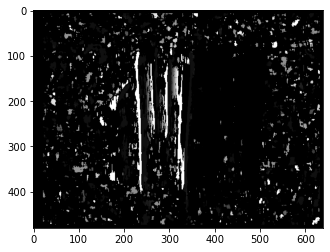

In [4]:
img = cv2.imread('china_camera.jpg', cv2.IMREAD_GRAYSCALE)
imgL = img[0:480,0:640]
imgR = img[0:480,640:1280]

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)

plt.imshow(disparity,'gray')
plt.show()